# Load dataset and import libs

In [3]:
import sys
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Dense, Dropout, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D , BatchNormalization
from tensorflow.keras.optimizers import SGD, Adam
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
import matplotlib.pyplot as plt
import matplotlib.image as img
import numpy as np
from tensorflow.keras.preprocessing.image import ImageDataGenerator
#confusion_mtx
from numpy import expand_dims
import pandas as pd
import seaborn as sn
#vgg
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.applications.vgg16 import preprocess_input, decode_predictions, VGG16
import tensorflow_datasets as tfds

In [ ]:
(x_train  , y_train) , (x_test , y_test)  = cifar10.load_data()          

# Display 10 images with their labels

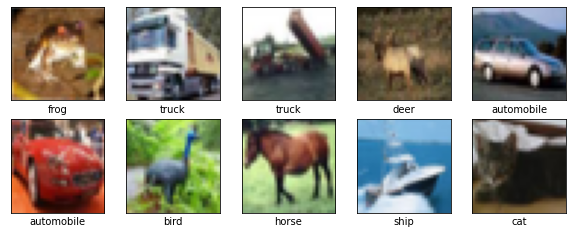

In [ ]:
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

num_classes = 10 # or = len(np.unique(y_train))

plt.figure(figsize=(10,10))
for i in range(10):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_train[i])
    # The CIFAR labels happen to be arrays, which is why you need the extra index
    plt.xlabel(class_names[y_train[i][0]])
plt.show()

# Preprocessing

In [ ]:
# train and test data with normalization
x_train = x_train / 255.0
x_test = x_test / 255.0

# Train,Test,Valid,One Hot
num_valid = int(0.2*x_train.shape[0])
num_train = x_train.shape[0]-num_valid

x_valid = x_train[num_train:]
y_valid = y_train[num_train:]

x_train = x_train[0:num_train]
y_train = y_train[0:num_train]

# one-hot encode the labels
y_train_hot = to_categorical(y_train, num_classes)
y_valid_hot = to_categorical(y_valid, num_classes)
y_test_hot = to_categorical(y_test, num_classes)

In [ ]:
# check shape 
print('x_train:\t {}'.format(x_train.shape))
print('y_train:\t {}'.format(y_train.shape))
print('y_train_hot:\t {}\n'.format(y_train_hot.shape))

print('x_valid:\t {}'.format(x_valid.shape))
print('y_valid:\t {}'.format(y_valid.shape))
print('y_valid_hot:\t {}\n'.format(y_valid_hot.shape))

print('x_test:\t\t {}'.format(x_test.shape))
print('y_test:\t\t {}'.format(y_test.shape))
print('y_test_hot:\t {}'.format(y_test_hot.shape))

x_train:	 (40000, 32, 32, 3)
y_train:	 (40000, 1)
y_train_hot:	 (40000, 10)

x_valid:	 (10000, 32, 32, 3)
y_valid:	 (10000, 1)
y_valid_hot:	 (10000, 10)

x_test:		 (10000, 32, 32, 3)
y_test:		 (10000, 1)
y_test_hot:	 (10000, 10)


# MLP

In [ ]:
def plot_curves(history):
	# plot loss
	plt.title('Cross Entropy Loss')
	plt.plot(history.history['loss'], label='train')
	plt.plot(history.history['val_loss'], label='test')
	plt.show()
	# plot accuracy
	plt.title('Classification Accuracy')
	plt.plot(history.history['accuracy'], label='train')
	plt.plot(history.history['val_accuracy'], label='test')
	plt.show()

Epoch 1/100
1250/1250 [==============================] - 11s 7ms/step - loss: 1.8517 - accuracy: 0.3414 - val_loss: 1.7239 - val_accuracy: 0.3953
Epoch 2/100
1250/1250 [==============================] - 8s 6ms/step - loss: 1.6642 - accuracy: 0.4113 - val_loss: 1.6823 - val_accuracy: 0.4033
Epoch 3/100
1250/1250 [==============================] - 8s 6ms/step - loss: 1.5823 - accuracy: 0.4416 - val_loss: 1.5863 - val_accuracy: 0.4421
Epoch 4/100
1250/1250 [==============================] - 8s 6ms/step - loss: 1.5256 - accuracy: 0.4605 - val_loss: 1.5435 - val_accuracy: 0.4506
Epoch 5/100
1250/1250 [==============================] - 8s 6ms/step - loss: 1.4803 - accuracy: 0.4757 - val_loss: 1.5238 - val_accuracy: 0.4592
Epoch 6/100
1250/1250 [==============================] - 8s 6ms/step - loss: 1.4389 - accuracy: 0.4924 - val_loss: 1.4898 - val_accuracy: 0.4822
Epoch 7/100
1250/1250 [==============================] - 8s 6ms/step - loss: 1.4064 - accuracy: 0.5046 - val_loss: 1.4834 - val_a

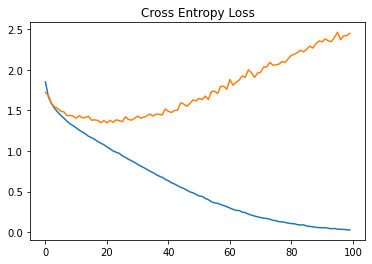

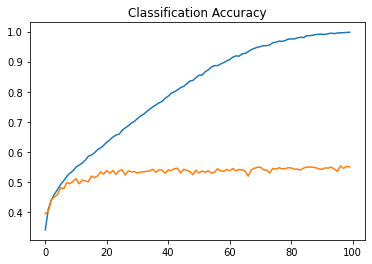

In [ ]:
model = Sequential()  

model.add(Flatten(input_shape = x_train.shape[1:]))
model.add(Dense(1024, activation = 'relu'))     
model.add(Dense(512, activation = 'relu'))     
model.add(Dense(10, activation = 'softmax'))  

# ===================================================================
opt = SGD(learning_rate=0.001, momentum=0.9)
model.compile(optimizer = opt, loss = 'categorical_crossentropy', metrics = 'accuracy')

# ===================================================================

history = model.fit(x_train, y_train_hot, epochs = 100, validation_data = (x_valid, y_valid_hot))

print('\n ####################################################### \n')
_, acc = model.evaluate(x_test, y_test_hot, verbose=1)

plot_curves(history)

## a. Stochastic mini batch based (Minibatch Gradient Descent)

### Batch_size=32

Epoch 1/100
1250/1250 [==============================] - 9s 7ms/step - loss: 1.8576 - accuracy: 0.3400 - val_loss: 1.7387 - val_accuracy: 0.3860
Epoch 2/100
1250/1250 [==============================] - 8s 6ms/step - loss: 1.6629 - accuracy: 0.4130 - val_loss: 1.6507 - val_accuracy: 0.4167
Epoch 3/100
1250/1250 [==============================] - 8s 6ms/step - loss: 1.5794 - accuracy: 0.4459 - val_loss: 1.5880 - val_accuracy: 0.4425
Epoch 4/100
1250/1250 [==============================] - 8s 6ms/step - loss: 1.5221 - accuracy: 0.4631 - val_loss: 1.5756 - val_accuracy: 0.4463
Epoch 5/100
1250/1250 [==============================] - 8s 6ms/step - loss: 1.4784 - accuracy: 0.4798 - val_loss: 1.5364 - val_accuracy: 0.4562
Epoch 6/100
1250/1250 [==============================] - 8s 6ms/step - loss: 1.4353 - accuracy: 0.4947 - val_loss: 1.5007 - val_accuracy: 0.4749
Epoch 7/100
1250/1250 [==============================] - 8s 6ms/step - loss: 1.4042 - accuracy: 0.5036 - val_loss: 1.4628 - val_ac

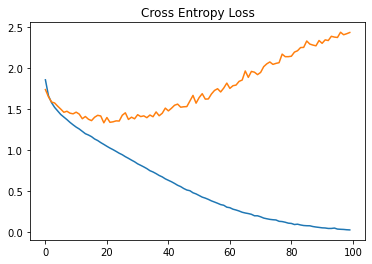

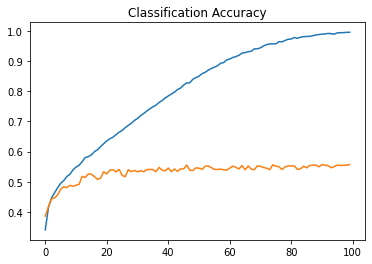

In [ ]:
model = Sequential()  

model.add(Flatten(input_shape = x_train.shape[1:]))
model.add(Dense(1024, activation = 'relu'))     
model.add(Dense(512, activation = 'relu'))     
model.add(Dense(10, activation = 'softmax'))  

# ===================================================================
opt = SGD(learning_rate=0.001, momentum=0.9)
model.compile(optimizer = opt, loss = 'categorical_crossentropy', metrics = 'accuracy')

# ===================================================================

history = model.fit(x_train, y_train_hot, epochs = 100, batch_size=32, validation_data = (x_valid, y_valid_hot))

print('\n ####################################################### \n')
_, acc = model.evaluate(x_test, y_test_hot, verbose=1)

plot_curves(history)

### Batch_size=64

Epoch 1/100
625/625 [==============================] - 5s 7ms/step - loss: 1.9131 - accuracy: 0.3211 - val_loss: 1.7844 - val_accuracy: 0.3725
Epoch 2/100
625/625 [==============================] - 4s 7ms/step - loss: 1.7227 - accuracy: 0.3997 - val_loss: 1.7177 - val_accuracy: 0.3944
Epoch 3/100
625/625 [==============================] - 4s 7ms/step - loss: 1.6437 - accuracy: 0.4245 - val_loss: 1.6820 - val_accuracy: 0.4165
Epoch 4/100
625/625 [==============================] - 4s 7ms/step - loss: 1.5914 - accuracy: 0.4417 - val_loss: 1.6122 - val_accuracy: 0.4369
Epoch 5/100
625/625 [==============================] - 4s 7ms/step - loss: 1.5459 - accuracy: 0.4590 - val_loss: 1.5781 - val_accuracy: 0.4472
Epoch 6/100
625/625 [==============================] - 4s 7ms/step - loss: 1.5097 - accuracy: 0.4710 - val_loss: 1.5638 - val_accuracy: 0.4597
Epoch 7/100
625/625 [==============================] - 4s 7ms/step - loss: 1.4825 - accuracy: 0.4830 - val_loss: 1.5381 - val_accuracy: 0.4628

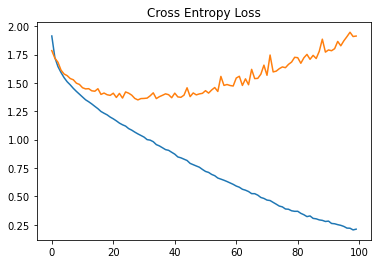

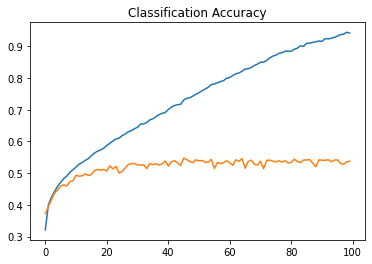

In [ ]:
model = Sequential()  

model.add(Flatten(input_shape = x_train.shape[1:]))
model.add(Dense(1024, activation = 'relu'))     
model.add(Dense(512, activation = 'relu'))     
model.add(Dense(10, activation = 'softmax'))  

# ===================================================================
opt = SGD(learning_rate=0.001, momentum=0.9)
model.compile(optimizer = opt, loss = 'categorical_crossentropy', metrics = 'accuracy')

# ===================================================================

history = model.fit(x_train, y_train_hot, epochs = 100, batch_size=64, validation_data = (x_valid, y_valid_hot))

print('\n ####################################################### \n')
_, acc = model.evaluate(x_test, y_test_hot, verbose=1)

plot_curves(history)

### Batch_size=256

Epoch 1/100
157/157 [==============================] - 3s 14ms/step - loss: 2.0692 - accuracy: 0.2640 - val_loss: 1.9419 - val_accuracy: 0.3147
Epoch 2/100
157/157 [==============================] - 2s 12ms/step - loss: 1.8791 - accuracy: 0.3485 - val_loss: 1.8513 - val_accuracy: 0.3557
Epoch 3/100
157/157 [==============================] - 2s 12ms/step - loss: 1.8083 - accuracy: 0.3722 - val_loss: 1.8017 - val_accuracy: 0.3805
Epoch 4/100
157/157 [==============================] - 2s 12ms/step - loss: 1.7645 - accuracy: 0.3886 - val_loss: 1.7714 - val_accuracy: 0.3826
Epoch 5/100
157/157 [==============================] - 2s 11ms/step - loss: 1.7289 - accuracy: 0.4035 - val_loss: 1.7481 - val_accuracy: 0.3899
Epoch 6/100
157/157 [==============================] - 2s 12ms/step - loss: 1.7014 - accuracy: 0.4104 - val_loss: 1.7206 - val_accuracy: 0.3973
Epoch 7/100
157/157 [==============================] - 2s 11ms/step - loss: 1.6759 - accuracy: 0.4200 - val_loss: 1.7011 - val_accuracy:

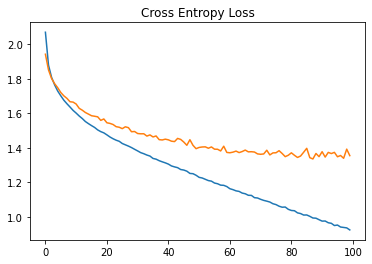

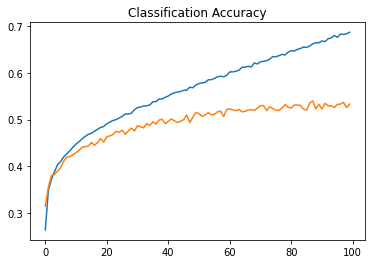

In [ ]:
model = Sequential()  

model.add(Flatten(input_shape = x_train.shape[1:]))
model.add(Dense(1024, activation = 'relu'))     
model.add(Dense(512, activation = 'relu'))     
model.add(Dense(10, activation = 'softmax'))  

# ===================================================================
opt = SGD(learning_rate=0.001, momentum=0.9)
model.compile(optimizer = opt, loss = 'categorical_crossentropy', metrics = 'accuracy')

# ===================================================================

history = model.fit(x_train, y_train_hot, epochs = 100, batch_size=256, validation_data = (x_valid, y_valid_hot))

print('\n ####################################################### \n')
_, acc = model.evaluate(x_test, y_test_hot, verbose=1)

plot_curves(history)

## b. Change activation functions

### 1.Tanh

Epoch 1/100
1250/1250 [==============================] - 9s 7ms/step - loss: 1.8640 - accuracy: 0.3396 - val_loss: 1.8016 - val_accuracy: 0.3562
Epoch 2/100
1250/1250 [==============================] - 8s 6ms/step - loss: 1.7085 - accuracy: 0.3980 - val_loss: 1.7336 - val_accuracy: 0.3977
Epoch 3/100
1250/1250 [==============================] - 8s 6ms/step - loss: 1.6315 - accuracy: 0.4227 - val_loss: 1.6593 - val_accuracy: 0.4153
Epoch 4/100
1250/1250 [==============================] - 8s 6ms/step - loss: 1.5785 - accuracy: 0.4422 - val_loss: 1.5924 - val_accuracy: 0.4505
Epoch 5/100
1250/1250 [==============================] - 8s 6ms/step - loss: 1.5411 - accuracy: 0.4577 - val_loss: 1.5802 - val_accuracy: 0.4452
Epoch 6/100
1250/1250 [==============================] - 8s 6ms/step - loss: 1.5080 - accuracy: 0.4680 - val_loss: 1.5570 - val_accuracy: 0.4573
Epoch 7/100
1250/1250 [==============================] - 8s 6ms/step - loss: 1.4774 - accuracy: 0.4799 - val_loss: 1.5214 - val_ac

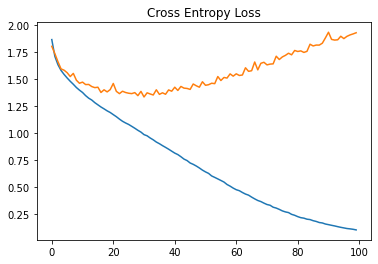

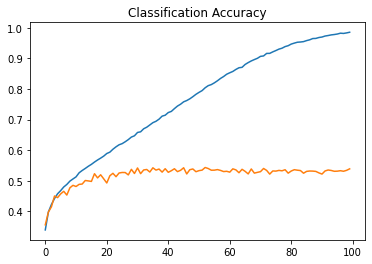

In [ ]:
model = Sequential()  

model.add(Flatten(input_shape = x_train.shape[1:]))
model.add(Dense(1024, activation = 'tanh'))     
model.add(Dense(512, activation = 'tanh'))     
model.add(Dense(10, activation = 'softmax'))  

# ===================================================================
opt = SGD(learning_rate=0.001, momentum=0.9)
model.compile(optimizer = opt, loss = 'categorical_crossentropy', metrics = 'accuracy')

# ===================================================================

history = model.fit(x_train, y_train_hot, epochs = 100, batch_size=32, validation_data = (x_valid, y_valid_hot))

print('\n ####################################################### \n')
_, acc = model.evaluate(x_test, y_test_hot, verbose=1)

plot_curves(history)

### Confusion matrix

Text(0.5, 69.0, 'Predictions')

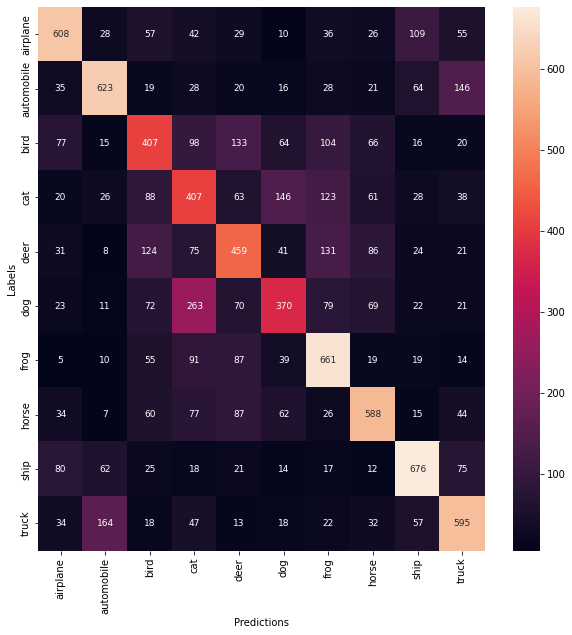

In [ ]:
y_pred=model.predict(x_test)
con = tf.math.confusion_matrix(labels=tf.argmax(y_test_hot, axis=1), predictions=tf.argmax(y_pred, axis=1), num_classes=num_classes).numpy()
df_cm = pd.DataFrame(con, index = [i for i in class_names], columns = [i for i in class_names])
plt.figure(figsize = (10,10))
sn.heatmap(df_cm, annot=True, fmt='.0f',annot_kws={"size": 9})
plt.ylabel('Labels')
plt.xlabel('Predictions')

### 2.elu

Epoch 1/100
1250/1250 [==============================] - 9s 6ms/step - loss: 1.8734 - accuracy: 0.3344 - val_loss: 1.7693 - val_accuracy: 0.3810
Epoch 2/100
1250/1250 [==============================] - 7s 6ms/step - loss: 1.7108 - accuracy: 0.3982 - val_loss: 1.6823 - val_accuracy: 0.4145
Epoch 3/100
1250/1250 [==============================] - 8s 6ms/step - loss: 1.6330 - accuracy: 0.4236 - val_loss: 1.6860 - val_accuracy: 0.4010
Epoch 4/100
1250/1250 [==============================] - 7s 6ms/step - loss: 1.5873 - accuracy: 0.4419 - val_loss: 1.6271 - val_accuracy: 0.4270
Epoch 5/100
1250/1250 [==============================] - 7s 6ms/step - loss: 1.5466 - accuracy: 0.4553 - val_loss: 1.5973 - val_accuracy: 0.4351
Epoch 6/100
1250/1250 [==============================] - 7s 6ms/step - loss: 1.5203 - accuracy: 0.4671 - val_loss: 1.5577 - val_accuracy: 0.4527
Epoch 7/100
1250/1250 [==============================] - 7s 6ms/step - loss: 1.4899 - accuracy: 0.4755 - val_loss: 1.5308 - val_ac

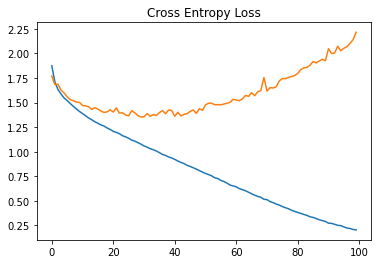

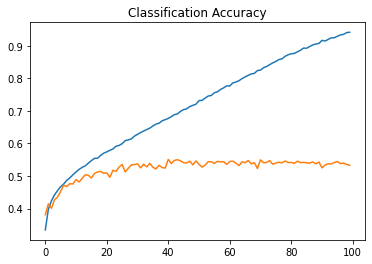

In [ ]:
model = Sequential()  

model.add(Flatten(input_shape = x_train.shape[1:]))
model.add(Dense(1024, activation = 'elu'))     
model.add(Dense(512, activation = 'elu'))     
model.add(Dense(10, activation = 'softmax'))  

# ===================================================================
opt = SGD(learning_rate=0.001, momentum=0.9)
model.compile(optimizer = opt, loss = 'categorical_crossentropy', metrics = 'accuracy')

# ===================================================================

history = model.fit(x_train, y_train_hot, epochs = 100, batch_size=32, validation_data = (x_valid, y_valid_hot))

print('\n ####################################################### \n')
_, acc = model.evaluate(x_test, y_test_hot, verbose=1)

plot_curves(history)

### Confusion matrix

Text(0.5, 69.0, 'Predictions')

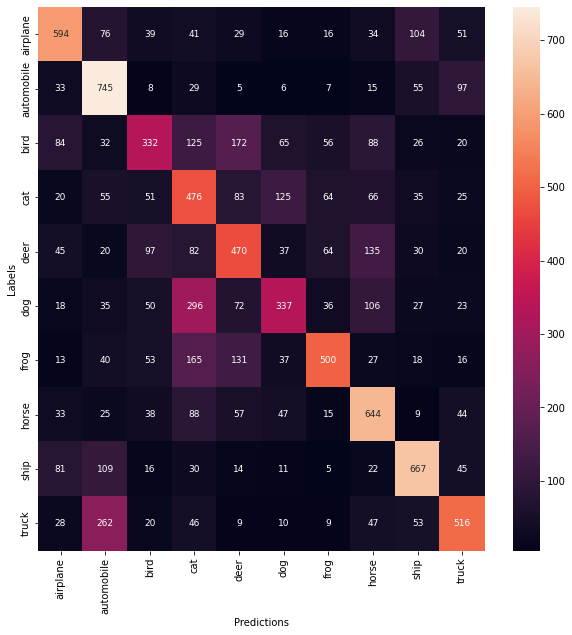

In [ ]:
y_pred=model.predict(x_test)
con = tf.math.confusion_matrix(labels=tf.argmax(y_test_hot, axis=1), predictions=tf.argmax(y_pred, axis=1), num_classes=num_classes).numpy()
df_cm = pd.DataFrame(con, index = [i for i in class_names], columns = [i for i in class_names])
plt.figure(figsize = (10,10))
sn.heatmap(df_cm, annot=True, fmt='.0f',annot_kws={"size": 9})
plt.ylabel('Labels')
plt.xlabel('Predictions')

## c. Change loss function

## MSE

Epoch 1/100
1250/1250 [==============================] - 8s 6ms/step - loss: 0.0866 - accuracy: 0.2793 - val_loss: 0.0782 - val_accuracy: 0.3432
Epoch 2/100
1250/1250 [==============================] - 8s 6ms/step - loss: 0.0757 - accuracy: 0.3672 - val_loss: 0.0753 - val_accuracy: 0.3758
Epoch 3/100
1250/1250 [==============================] - 7s 6ms/step - loss: 0.0736 - accuracy: 0.3954 - val_loss: 0.0744 - val_accuracy: 0.3852
Epoch 4/100
1250/1250 [==============================] - 8s 6ms/step - loss: 0.0718 - accuracy: 0.4169 - val_loss: 0.0726 - val_accuracy: 0.4089
Epoch 5/100
1250/1250 [==============================] - 8s 6ms/step - loss: 0.0706 - accuracy: 0.4288 - val_loss: 0.0728 - val_accuracy: 0.4024
Epoch 6/100
1250/1250 [==============================] - 8s 6ms/step - loss: 0.0695 - accuracy: 0.4383 - val_loss: 0.0708 - val_accuracy: 0.4298
Epoch 7/100
1250/1250 [==============================] - 8s 6ms/step - loss: 0.0683 - accuracy: 0.4502 - val_loss: 0.0696 - val_ac

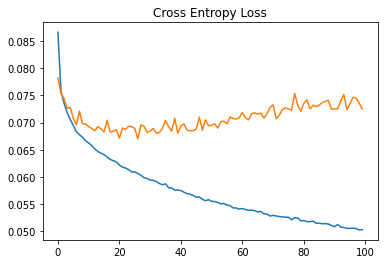

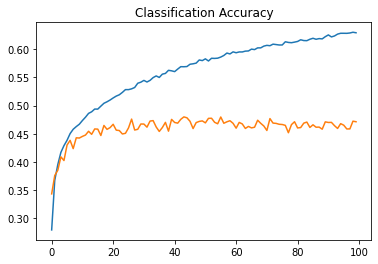

In [ ]:
model = Sequential()  

model.add(Flatten(input_shape = x_train.shape[1:]))
model.add(Dense(1024, activation = 'relu'))     
model.add(Dense(512, activation = 'relu'))     
model.add(Dense(10, activation = 'softmax'))  

# ===================================================================
opt = Adam(learning_rate=0.001)
model.compile(optimizer = opt, loss = 'MSE', metrics = 'accuracy')

# ===================================================================

history = model.fit(x_train, y_train_hot, epochs = 100, batch_size=32, validation_data = (x_valid, y_valid_hot))

print('\n ####################################################### \n')
_, acc = model.evaluate(x_test, y_test_hot, verbose=1)

plot_curves(history)

Text(0.5, 69.0, 'Predictions')

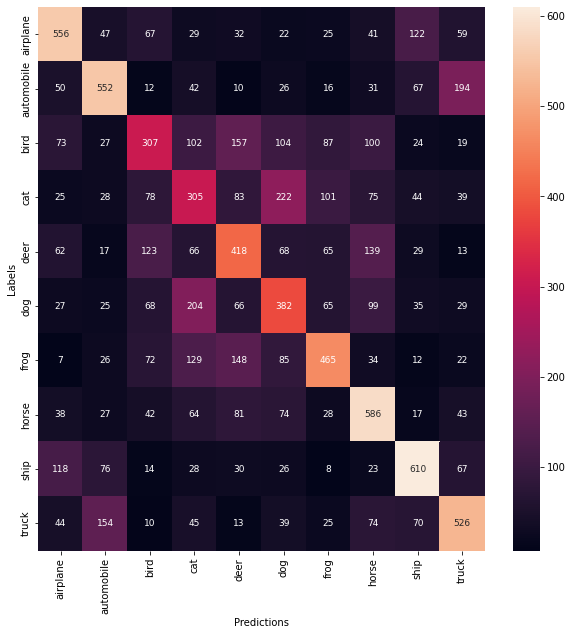

In [ ]:
y_pred=model.predict(x_test)
con = tf.math.confusion_matrix(labels=tf.argmax(y_test_hot, axis=1), predictions=tf.argmax(y_pred, axis=1), num_classes=num_classes).numpy()
df_cm = pd.DataFrame(con, index = [i for i in class_names], columns = [i for i in class_names])
plt.figure(figsize = (10,10))
sn.heatmap(df_cm, annot=True, fmt='.0f',annot_kws={"size": 9})
plt.ylabel('Labels')
plt.xlabel('Predictions')

Epoch 1/100
1250/1250 [==============================] - 8s 6ms/step - loss: 1.0751 - accuracy: 0.1324 - val_loss: 1.0695 - val_accuracy: 0.1813
Epoch 2/100
1250/1250 [==============================] - 8s 6ms/step - loss: 1.0666 - accuracy: 0.1956 - val_loss: 1.0637 - val_accuracy: 0.2034
Epoch 3/100
1250/1250 [==============================] - 8s 6ms/step - loss: 1.0629 - accuracy: 0.2041 - val_loss: 1.0612 - val_accuracy: 0.2075
Epoch 4/100
1250/1250 [==============================] - 8s 6ms/step - loss: 1.0600 - accuracy: 0.2215 - val_loss: 1.0587 - val_accuracy: 0.2306
Epoch 5/100
1250/1250 [==============================] - 8s 6ms/step - loss: 1.0571 - accuracy: 0.2430 - val_loss: 1.0565 - val_accuracy: 0.2506
Epoch 6/100
1250/1250 [==============================] - 8s 6ms/step - loss: 1.0545 - accuracy: 0.2595 - val_loss: 1.0541 - val_accuracy: 0.2584
Epoch 7/100
1250/1250 [==============================] - 8s 6ms/step - loss: 1.0524 - accuracy: 0.2683 - val_loss: 1.0525 - val_ac

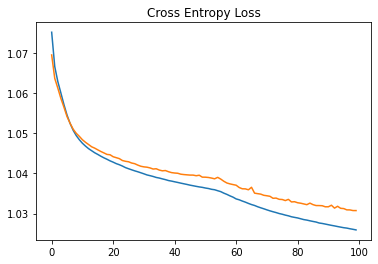

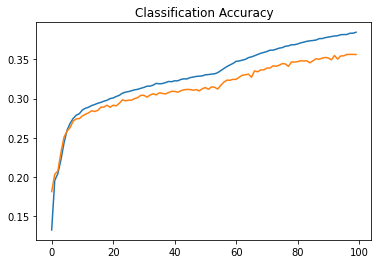

In [ ]:
model = Sequential()  

model.add(Flatten(input_shape = x_train.shape[1:]))
model.add(Dense(1024, activation = 'relu'))     
model.add(Dense(512, activation = 'relu'))     
model.add(Dense(10, activation = 'softmax'))  

# ===================================================================
opt = Adam(learning_rate=0.001)
model.compile(optimizer = opt, loss = 'hinge', metrics = 'accuracy')

# ===================================================================

history = model.fit(x_train, y_train_hot, epochs = 100, batch_size=32, validation_data = (x_valid, y_valid_hot))

print('\n ####################################################### \n')
_, acc = model.evaluate(x_test, y_test_hot, verbose=1)

plot_curves(history)

Text(0.5, 69.0, 'Predictions')

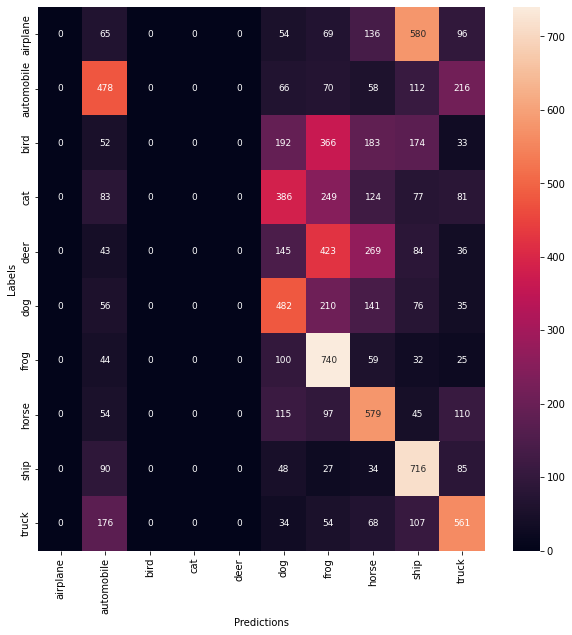

In [ ]:
y_pred=model.predict(x_test)
con = tf.math.confusion_matrix(labels=tf.argmax(y_test_hot, axis=1), predictions=tf.argmax(y_pred, axis=1), num_classes=num_classes).numpy()
df_cm = pd.DataFrame(con, index = [i for i in class_names], columns = [i for i in class_names])
plt.figure(figsize = (10,10))
sn.heatmap(df_cm, annot=True, fmt='.0f',annot_kws={"size": 9})
plt.ylabel('Labels')
plt.xlabel('Predictions')

## Recall, Precision and F-Score for our best model

In [ ]:
from keras import backend as K

def recall_m(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
    recall = true_positives / (possible_positives + K.epsilon())
    return recall

def precision_m(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
    precision = true_positives / (predicted_positives + K.epsilon())
    return precision

def f1_score(y_true, y_pred):
    precision = precision_m(y_true, y_pred)
    recall = recall_m(y_true, y_pred)
    return 2*((precision*recall)/(precision+recall+K.epsilon()))

Epoch 1/100
1250/1250 [==============================] - 12s 9ms/step - loss: 1.8549 - accuracy: 0.3382 - recall: 0.0601 - precision: 0.6411 - f1_score: 0.1049 - val_loss: 1.7451 - val_accuracy: 0.3890 - val_recall: 0.1105 - val_precision: 0.6496 - val_f1_score: 0.1852
Epoch 2/100
1250/1250 [==============================] - 10s 8ms/step - loss: 1.6693 - accuracy: 0.4105 - recall: 0.1303 - precision: 0.6736 - f1_score: 0.2138 - val_loss: 1.6440 - val_accuracy: 0.4204 - val_recall: 0.1533 - val_precision: 0.6753 - val_f1_score: 0.2461
Epoch 3/100
1250/1250 [==============================] - 10s 8ms/step - loss: 1.5886 - accuracy: 0.4401 - recall: 0.1760 - precision: 0.6829 - f1_score: 0.2753 - val_loss: 1.6090 - val_accuracy: 0.4305 - val_recall: 0.1912 - val_precision: 0.6535 - val_f1_score: 0.2923
Epoch 4/100
1250/1250 [==============================] - 10s 8ms/step - loss: 1.5276 - accuracy: 0.4624 - recall: 0.2072 - precision: 0.6913 - f1_score: 0.3143 - val_loss: 1.5652 - val_accur

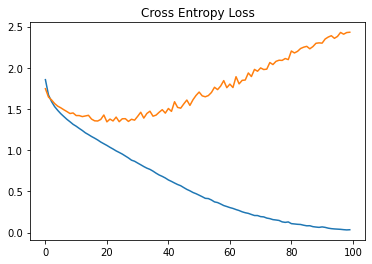

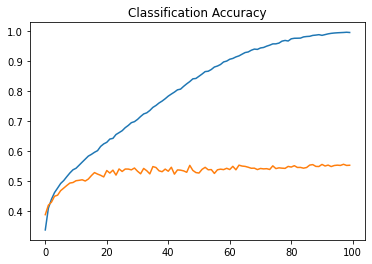

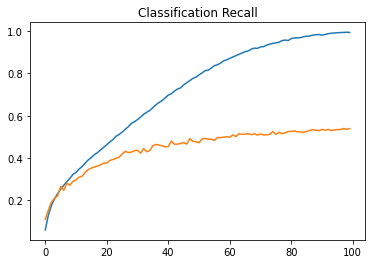

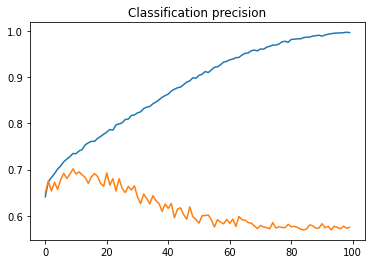

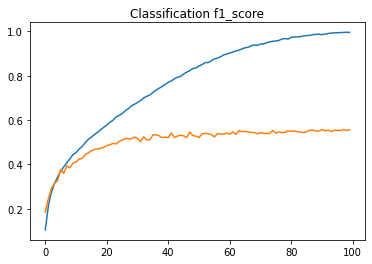

In [ ]:
model = Sequential()   

model.add(Flatten(input_shape = x_train.shape[1:]))
model.add(Dense(1024, activation = 'relu'))     
model.add(Dense(512, activation = 'relu'))     
model.add(Dense(10, activation = 'softmax'))  

# ===================================================================
opt = SGD(learning_rate=0.001, momentum=0.9)
model.compile(optimizer = opt, loss = 'categorical_crossentropy', metrics = ['accuracy', 'Recall', 'Precision', f1_score])

# ===================================================================

history = model.fit(x_train, y_train_hot, epochs = 100, batch_size=32, validation_data = (x_valid, y_valid_hot))

print('\n ####################################################### \n')
model.evaluate(x_test, y_test_hot, verbose=1)

plot_curves(history)
# plot Recall
plt.title('Classification Recall')
plt.plot(history.history['recall'], label='train')
plt.plot(history.history['val_recall'], label='test')
plt.show()
# plot precision
plt.title('Classification precision')
plt.plot(history.history['precision'], label='train')
plt.plot(history.history['val_precision'], label='test')
plt.show()
# plot f1_score
plt.title('Classification f1_score')
plt.plot(history.history['f1_score'], label='train')
plt.plot(history.history['val_f1_score'], label='test')
plt.show()

## Imbalanced Dataset

In [ ]:
(x_train  , y_train) , (x_test , y_test)  = tf.keras.datasets.cifar10.load_data()   
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
num_classes = 10

### Delete half of airplanes and birds datas

In [ ]:
b = 2500

a = (y_train == 0).reshape(-1,) #airplane
np.random.seed(0)
rnd_indices = np.random.choice(x_train[a].shape[0], size=b, replace=False)
x_train = np.concatenate((x_train[~a], x_train[a][rnd_indices]), axis=0)
y_train = np.concatenate((y_train[~a], y_train[a][rnd_indices]), axis=0) 

a = (y_train == 2).reshape(-1,) #bird
rnd_indices = np.random.choice(x_train[a].shape[0], size=b, replace=False)
x_train = np.concatenate((x_train[~a], x_train[a][rnd_indices]), axis=0) # new x_train
y_train = np.concatenate((y_train[~a], y_train[a][rnd_indices]), axis=0) # new y_train

num_train = x_train.shape[0]

In [ ]:
#shuffle dataset
indices = tf.range(start=0, limit=tf.shape(x_train)[0], dtype=tf.int32)
shuffled_indices = tf.random.shuffle(indices)

x_train = tf.gather(x_train, shuffled_indices).numpy()
y_train = tf.gather(y_train, shuffled_indices).numpy()

In [ ]:
# check shape 
print('x_train:\t {}'.format(x_train.shape))
print('y_train:\t {}'.format(y_train.shape))

x_train:	 (45000, 32, 32, 3)
y_train:	 (45000, 1)


In [ ]:
# train and test data with normalization
x_train = x_train / 255.0
x_test = x_test / 255.0

# Train,Test,Valid,One Hot
num_valid = int(0.2*x_train.shape[0])
num_train = x_train.shape[0]-num_valid

x_valid = x_train[num_train:]
y_valid = y_train[num_train:]

x_train = x_train[0:num_train]
y_train = y_train[0:num_train]

# one-hot encode the labels
y_train_hot = tf.keras.utils.to_categorical(y_train, num_classes)
y_valid_hot = tf.keras.utils.to_categorical(y_valid, num_classes)
y_test_hot = tf.keras.utils.to_categorical(y_test, num_classes)

In [ ]:
# check final shape 
print('x_train:\t {}'.format(x_train.shape))
print('y_train:\t {}'.format(y_train.shape))
print('y_train_hot:\t {}\n'.format(y_train_hot.shape))

print('x_valid:\t {}'.format(x_valid.shape))
print('y_valid:\t {}'.format(y_valid.shape))
print('y_valid_hot:\t {}\n'.format(y_valid_hot.shape))

print('x_test:\t\t {}'.format(x_test.shape))
print('y_test:\t\t {}'.format(y_test.shape))
print('y_test_hot:\t {}'.format(y_test_hot.shape))

x_train:	 (36000, 32, 32, 3)
y_train:	 (36000, 1)
y_train_hot:	 (36000, 10)

x_valid:	 (9000, 32, 32, 3)
y_valid:	 (9000, 1)
y_valid_hot:	 (9000, 10)

x_test:		 (10000, 32, 32, 3)
y_test:		 (10000, 1)
y_test_hot:	 (10000, 10)


Epoch 1/100
1125/1125 [==============================] - 9s 6ms/step - loss: 1.8419 - accuracy: 0.3466 - val_loss: 1.7265 - val_accuracy: 0.3771
Epoch 2/100
1125/1125 [==============================] - 7s 6ms/step - loss: 1.6423 - accuracy: 0.4262 - val_loss: 1.6175 - val_accuracy: 0.4317
Epoch 3/100
1125/1125 [==============================] - 7s 6ms/step - loss: 1.5622 - accuracy: 0.4534 - val_loss: 1.5788 - val_accuracy: 0.4497
Epoch 4/100
1125/1125 [==============================] - 7s 6ms/step - loss: 1.5034 - accuracy: 0.4746 - val_loss: 1.5422 - val_accuracy: 0.4586
Epoch 5/100
1125/1125 [==============================] - 7s 6ms/step - loss: 1.4544 - accuracy: 0.4894 - val_loss: 1.5389 - val_accuracy: 0.4537
Epoch 6/100
1125/1125 [==============================] - 6s 6ms/step - loss: 1.4174 - accuracy: 0.5058 - val_loss: 1.4717 - val_accuracy: 0.4804
Epoch 7/100
1125/1125 [==============================] - 6s 6ms/step - loss: 1.3776 - accuracy: 0.5181 - val_loss: 1.4387 - val_ac

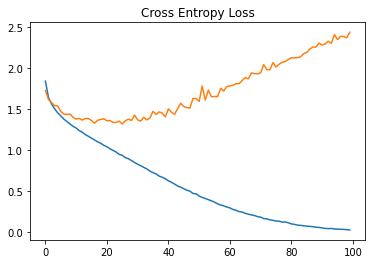

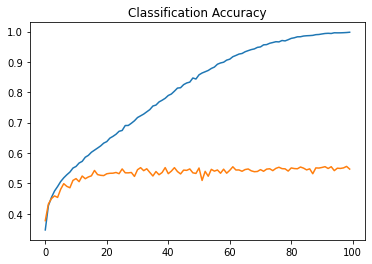

In [ ]:
model = Sequential()    

model.add(Flatten(input_shape = x_train.shape[1:]))
model.add(Dense(1024, activation = 'relu'))     
model.add(Dense(512, activation = 'relu'))     
model.add(Dense(10, activation = 'softmax'))  

# ===================================================================
opt = SGD(learning_rate=0.001, momentum=0.9)
model.compile(optimizer = opt, loss = 'categorical_crossentropy', metrics = ['accuracy'])

# ===================================================================

history = model.fit(x_train, y_train_hot, epochs = 100, batch_size=32, validation_data = (x_valid, y_valid_hot))

print('\n ####################################################### \n')
model.evaluate(x_test, y_test_hot, verbose=1)

plot_curves(history)

Text(0.5, 69.0, 'Predictions')

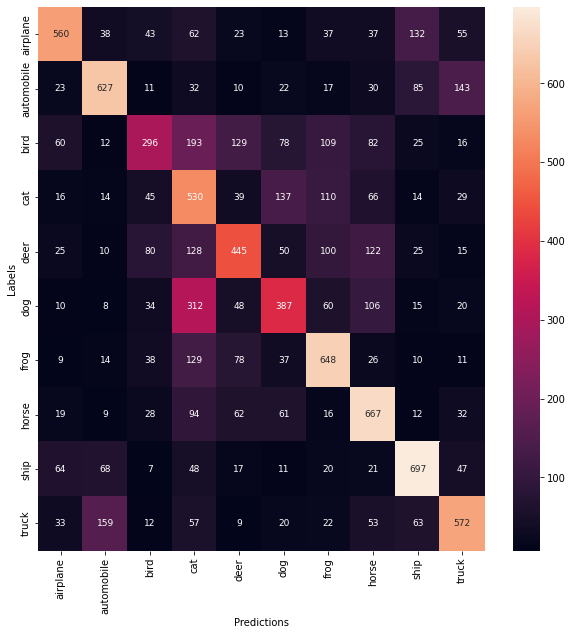

In [ ]:
y_pred=model.predict(x_test)
con = tf.math.confusion_matrix(labels=tf.argmax(y_test_hot, axis=1), predictions=tf.argmax(y_pred, axis=1), num_classes=num_classes).numpy()
df_cm = pd.DataFrame(con, index = [i for i in class_names], columns = [i for i in class_names])
plt.figure(figsize = (10,10))
sn.heatmap(df_cm, annot=True, fmt='.0f',annot_kws={"size": 9})
plt.ylabel('Labels')
plt.xlabel('Predictions')

Text(0.5, 69.0, 'Predictions')

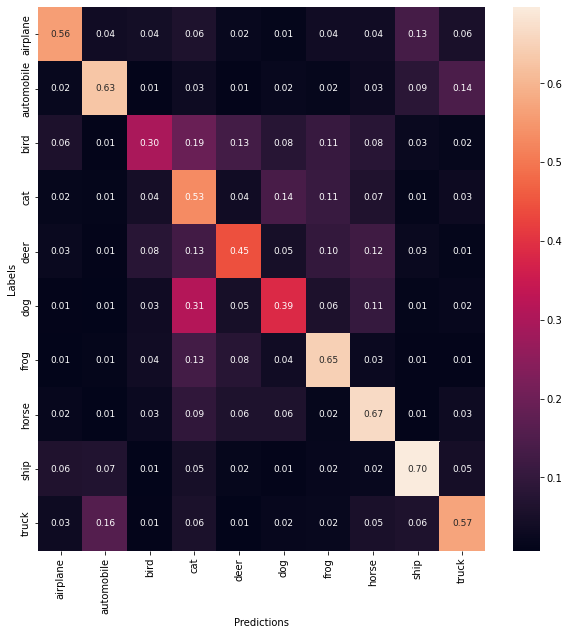

In [ ]:
# Normalize confution matrix 
cmn = con.astype('float') / con.sum(axis=1)[:, np.newaxis]
df_cm = pd.DataFrame(cmn, index = [i for i in class_names], columns = [i for i in class_names])
plt.figure(figsize = (10,10))
sn.heatmap(df_cm, annot=True, fmt='.2f',annot_kws={"size": 9})
plt.ylabel('Labels')
plt.xlabel('Predictions')

### Oversample the minority classes

In [ ]:
a = (y_train == 0).reshape(-1,)
x_train = np.concatenate((x_train[~a], np.tile(x_train[a],(2,1,1,1))), axis=0) # new x_train
y_train = np.concatenate((y_train[~a], np.tile(y_train[a],(2,1))), axis=0) # new y_train

a = (y_train == 2).reshape(-1,)
x_train = np.concatenate((x_train[~a], np.tile(x_train[a],(2,1,1,1))), axis=0) # new x_train
y_train = np.concatenate((y_train[~a], np.tile(y_train[a],(2,1))), axis=0) # new y_train

#shuffle dataset
indices = tf.range(start=0, limit=tf.shape(x_train)[0], dtype=tf.int32)
shuffled_indices = tf.random.shuffle(indices)

x_train = tf.gather(x_train, shuffled_indices).numpy()
y_train = tf.gather(y_train, shuffled_indices).numpy()
y_train_hot = tf.keras.utils.to_categorical(y_train, num_classes)

Epoch 1/100
1250/1250 [==============================] - 8s 6ms/step - loss: 1.8595 - accuracy: 0.3385 - val_loss: 1.7172 - val_accuracy: 0.3873
Epoch 2/100
1250/1250 [==============================] - 8s 6ms/step - loss: 1.6710 - accuracy: 0.4117 - val_loss: 1.6519 - val_accuracy: 0.4203
Epoch 3/100
1250/1250 [==============================] - 8s 6ms/step - loss: 1.5840 - accuracy: 0.4412 - val_loss: 1.5902 - val_accuracy: 0.4370
Epoch 4/100
1250/1250 [==============================] - 8s 6ms/step - loss: 1.5257 - accuracy: 0.4633 - val_loss: 1.5652 - val_accuracy: 0.4432
Epoch 5/100
1250/1250 [==============================] - 7s 6ms/step - loss: 1.4691 - accuracy: 0.4807 - val_loss: 1.4801 - val_accuracy: 0.4804
Epoch 6/100
1250/1250 [==============================] - 8s 6ms/step - loss: 1.4256 - accuracy: 0.4974 - val_loss: 1.4873 - val_accuracy: 0.4788
Epoch 7/100
1250/1250 [==============================] - 8s 6ms/step - loss: 1.3854 - accuracy: 0.5133 - val_loss: 1.4801 - val_ac

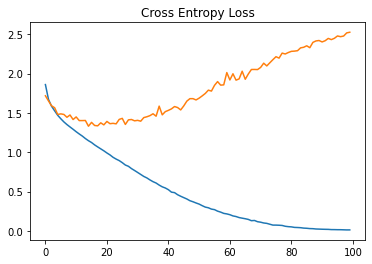

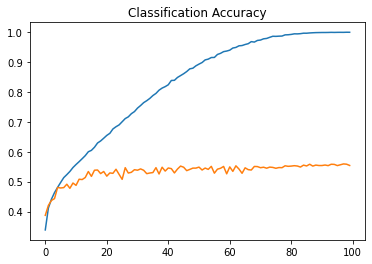

In [ ]:
model = Sequential()    

model.add(Flatten(input_shape = x_train.shape[1:]))
model.add(Dense(1024, activation = 'relu'))     
model.add(Dense(512, activation = 'relu'))     
model.add(Dense(10, activation = 'softmax'))  

# ===================================================================
opt = SGD(learning_rate=0.001, momentum=0.9)
model.compile(optimizer = opt, loss = 'categorical_crossentropy', metrics = ['accuracy'])

# ===================================================================

history = model.fit(x_train, y_train_hot, epochs = 100, batch_size=32, validation_data = (x_valid, y_valid_hot))

print('\n ####################################################### \n')
model.evaluate(x_test, y_test_hot, verbose=1)

plot_curves(history)

Text(0.5, 69.0, 'Predictions')

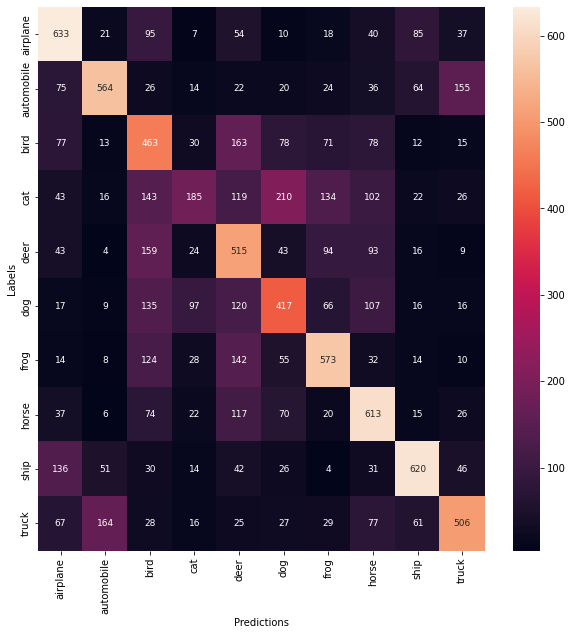

In [ ]:
y_pred=model.predict(x_test)
con = tf.math.confusion_matrix(labels=tf.argmax(y_test_hot, axis=1), predictions=tf.argmax(y_pred, axis=1), num_classes=num_classes).numpy()
df_cm = pd.DataFrame(con, index = [i for i in class_names], columns = [i for i in class_names])
plt.figure(figsize = (10,10))
sn.heatmap(df_cm, annot=True, fmt='.0f',annot_kws={"size": 9})
plt.ylabel('Labels')
plt.xlabel('Predictions')

# CNN

## Add CNN layers

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


Epoch 1/10
1250/1250 [==============================] - 134s 98ms/step - loss: 1.5545 - accuracy: 0.4359 - val_loss: 1.3115 - val_accuracy: 0.5298
Epoch 2/10
1250/1250 [==============================] - 121s 96ms/step - loss: 1.1626 - accuracy: 0.5827 - val_loss: 1.1441 - val_accuracy: 0.5924
Epoch 3/10
1250/1250 [==============================] - 125s 100ms/step - loss: 0.8951 - accuracy: 0.6848 - val_loss: 1.0422 - val_accuracy: 0.6348
Epoch 4/10
1250/1250 [==============================] - 125s 100ms/step - loss: 0.5944 - accuracy: 0.7933 - val_loss: 1.1226 - val_accuracy: 0.6387
Epoch 5/10
1250/1250 [==============================] - 121s 97ms/step - loss: 0.2797 - accuracy: 0.9047 - val_loss: 1.2187 - val_accuracy: 0.6513
Epoch 6/10
1250/1250 [==============================] - 121s 97ms/step - loss: 0.1158 - accuracy: 0.9625 - val_loss: 1.5701 - val_accuracy: 0.6366
Epoch 7/10
1250/1250 [==============================] - 121s 97ms/step - loss: 0.0586 - accuracy: 0.9810 - val_loss:

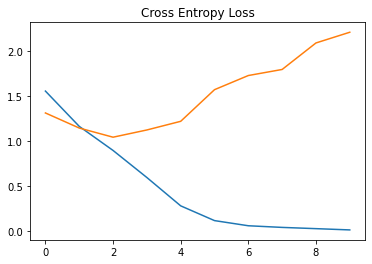

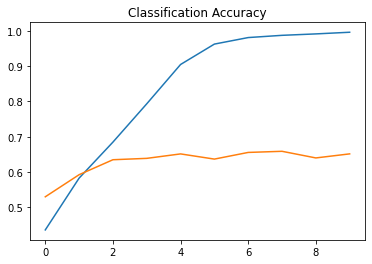

In [ ]:
# define cnn model
def define_model():
	model = Sequential()
	model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=(32, 32, 3)))
	model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))

	model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
	model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))

	model.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
	model.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))

	model.add(Flatten())
	model.add(Dense(1024, activation='relu'))
	model.add(Dense(512, activation='relu'))
	model.add(Dense(10, activation='softmax'))

	# compile model
	opt = SGD(lr=0.001, momentum=0.9)
	model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
	return model

model = define_model()

es = EarlyStopping(monitor='val_accuracy', mode='max', patience=5,  restore_best_weights=True)
history = model.fit(x_train, y_train_hot, epochs=10, batch_size=32, validation_data=(x_valid, y_valid_hot), verbose=1, callbacks=es)

print('\n ####################################################### \n')
_, acc = model.evaluate(x_test, y_test_hot, verbose=1)

plot_curves(history)

## Add Batch normalization and Pooling layers

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


Epoch 1/10
1250/1250 [==============================] - 32s 24ms/step - loss: 1.3969 - accuracy: 0.4987 - val_loss: 1.1573 - val_accuracy: 0.5866
Epoch 2/10
1250/1250 [==============================] - 30s 24ms/step - loss: 0.9659 - accuracy: 0.6586 - val_loss: 0.9718 - val_accuracy: 0.6623
Epoch 3/10
1250/1250 [==============================] - 32s 25ms/step - loss: 0.7562 - accuracy: 0.7334 - val_loss: 0.8925 - val_accuracy: 0.6901
Epoch 4/10
1250/1250 [==============================] - 32s 25ms/step - loss: 0.5959 - accuracy: 0.7908 - val_loss: 0.8422 - val_accuracy: 0.7136
Epoch 5/10
1250/1250 [==============================] - 31s 25ms/step - loss: 0.4535 - accuracy: 0.8436 - val_loss: 0.8251 - val_accuracy: 0.7196
Epoch 6/10
1250/1250 [==============================] - 31s 25ms/step - loss: 0.3373 - accuracy: 0.8875 - val_loss: 0.8909 - val_accuracy: 0.7187
Epoch 7/10
1250/1250 [==============================] - 32s 25ms/step - loss: 0.2316 - accuracy: 0.9241 - val_loss: 0.9230 -

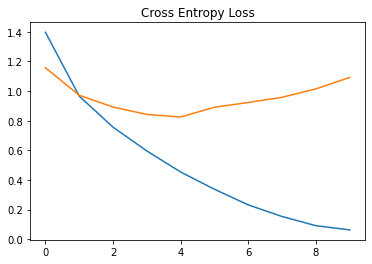

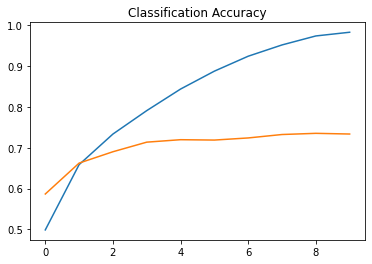

In [ ]:
# define cnn model
def define_model():
	model = Sequential()
	model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=(32, 32, 3)))
	model.add(BatchNormalization())
	model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
	model.add(BatchNormalization())
	model.add(MaxPooling2D((2, 2)))

	model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
	model.add(BatchNormalization())	
	model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
	model.add(BatchNormalization())
	model.add(MaxPooling2D((2, 2)))

	model.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
	model.add(BatchNormalization())	
	model.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
	model.add(BatchNormalization())	
	model.add(MaxPooling2D((2, 2)))

	model.add(Flatten())
	model.add(Dense(1024, activation='relu'))
	model.add(Dense(512, activation='relu'))
	model.add(Dense(10, activation='softmax'))
	# compile model
	opt = SGD(lr=0.001, momentum=0.9)
	model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
	return model

model = define_model()

es = EarlyStopping(monitor='val_accuracy', mode='max', patience=5,  restore_best_weights=True)
history = model.fit(x_train, y_train_hot, epochs=10, batch_size=32, validation_data=(x_valid, y_valid_hot), verbose=1, callbacks=es)

print('\n ####################################################### \n')
_, acc = model.evaluate(x_test, y_test_hot, verbose=1)

plot_curves(history)

## Add Drop out layer

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


Epoch 1/50
1250/1250 [==============================] - 39s 30ms/step - loss: 1.7022 - accuracy: 0.3844 - val_loss: 1.3255 - val_accuracy: 0.5244
Epoch 2/50
1250/1250 [==============================] - 37s 30ms/step - loss: 1.3039 - accuracy: 0.5285 - val_loss: 1.1263 - val_accuracy: 0.5924
Epoch 3/50
1250/1250 [==============================] - 38s 30ms/step - loss: 1.1164 - accuracy: 0.6015 - val_loss: 0.9637 - val_accuracy: 0.6540
Epoch 4/50
1250/1250 [==============================] - 38s 30ms/step - loss: 1.0014 - accuracy: 0.6417 - val_loss: 1.0157 - val_accuracy: 0.6434
Epoch 5/50
1250/1250 [==============================] - 38s 30ms/step - loss: 0.9178 - accuracy: 0.6761 - val_loss: 0.8414 - val_accuracy: 0.7010
Epoch 6/50
1250/1250 [==============================] - 37s 30ms/step - loss: 0.8568 - accuracy: 0.6963 - val_loss: 0.8121 - val_accuracy: 0.7135
Epoch 7/50
1250/1250 [==============================] - 37s 30ms/step - loss: 0.8023 - accuracy: 0.7148 - val_loss: 0.7753 -

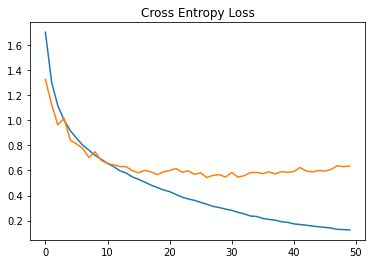

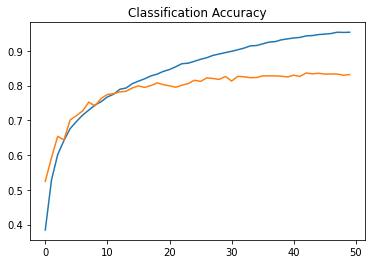

In [ ]:
# define cnn model
def define_model():
	model = Sequential()
	model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=(32, 32, 3)))
	model.add(BatchNormalization())
	model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
	model.add(BatchNormalization())
	model.add(MaxPooling2D((2, 2)))
	model.add(Dropout(0.2))
 
	model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
	model.add(BatchNormalization())	
	model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
	model.add(BatchNormalization())
	model.add(MaxPooling2D((2, 2)))
	model.add(Dropout(0.2))
 
	model.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
	model.add(BatchNormalization())	
	model.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
	model.add(BatchNormalization())	
	model.add(MaxPooling2D((2, 2)))
	model.add(Dropout(0.2))
 
	model.add(Flatten())
	model.add(Dense(1024, activation='relu'))
	model.add(Dropout(0.2))
	model.add(Dense(512, activation='relu'))
	model.add(Dropout(0.2)) 
	model.add(Dense(10, activation='softmax')) 
	# compile model
	opt = SGD(lr=0.001, momentum=0.9)
	model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
	return model

model = define_model()

history = model.fit(x_train, y_train_hot, epochs=50, batch_size=32, validation_data=(x_valid, y_valid_hot), verbose=1)

print('\n ####################################################### \n')
_, acc = model.evaluate(x_test, y_test_hot, verbose=1)

plot_curves(history)

### Confusion matrix

Text(0.5, 69.0, 'Predictions')

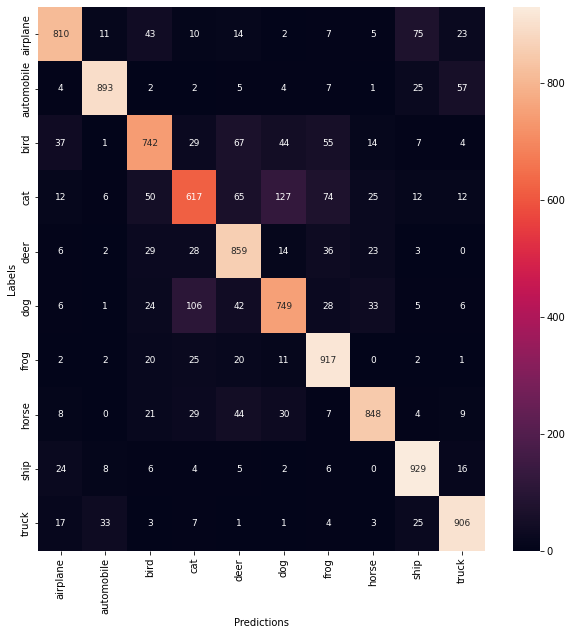

In [ ]:
y_pred=model.predict(x_test)
con = tf.math.confusion_matrix(labels=tf.argmax(y_test_hot, axis=1), predictions=tf.argmax(y_pred, axis=1), num_classes=num_classes).numpy()
df_cm = pd.DataFrame(con, index = [i for i in class_names], columns = [i for i in class_names])
plt.figure(figsize = (10,10))
sn.heatmap(df_cm, annot=True, fmt='.0f',annot_kws={"size": 9})
plt.ylabel('Labels')
plt.xlabel('Predictions')

Text(0.5, 69.0, 'Predictions')

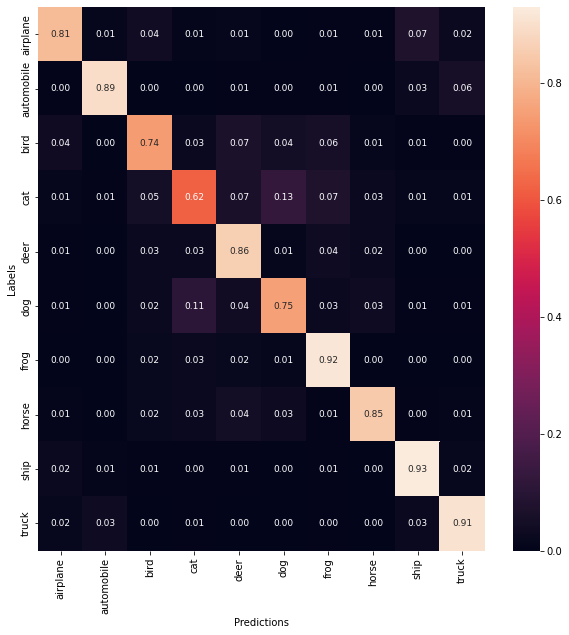

In [ ]:
# Normalize confution matrix 
cmn = con.astype('float') / con.sum(axis=1)[:, np.newaxis]
df_cm = pd.DataFrame(cmn, index = [i for i in class_names], columns = [i for i in class_names])
plt.figure(figsize = (10,10))
sn.heatmap(df_cm, annot=True, fmt='.2f',annot_kws={"size": 9})
plt.ylabel('Labels')
plt.xlabel('Predictions')

# Data Augmentation

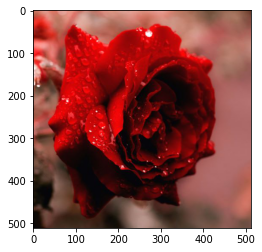

In [ ]:
image = img.imread('test.jpg')
# displaying the image
plt.imshow(image)

## Ten artificial examples

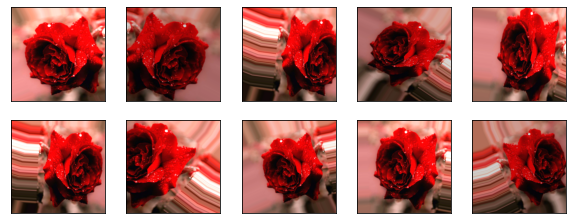

In [ ]:
# ImageDataGenerator
datagen = ImageDataGenerator(rotation_range=30,  # rotation
                                   width_shift_range=0.2,  # horizontal shift
                                   zoom_range=0.2,  # zoom
                                   horizontal_flip=True,  # horizontal flip
                                   brightness_range=[0.8,1.2])  # brightness
image_exp = expand_dims(image, 0)
# iterator
aug_iter = datagen.flow(image_exp, batch_size=1)


# generate batch of images
plt.figure(figsize=(10,10))
for i in range(10):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    image = next(aug_iter)[0].astype('uint8')
    plt.imshow(image)
plt.show()

## Delete 90 percent of dogs and cats classes

In [ ]:
(x_train  , y_train) , (x_test , y_test)  = tf.keras.datasets.cifar10.load_data()   
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
num_classes = 10

In [ ]:
b = 500

a = (y_train == 3).reshape(-1,) #cat
np.random.seed(0)
rnd_indices = np.random.choice(x_train[a].shape[0], size=b, replace=False)
x_train = np.concatenate((x_train[~a], x_train[a][rnd_indices]), axis=0) # new x_train
y_train = np.concatenate((y_train[~a], y_train[a][rnd_indices]), axis=0) # new y_train

a = (y_train == 5).reshape(-1,) #dog
rnd_indices = np.random.choice(x_train[a].shape[0], size=b, replace=False)
x_train = np.concatenate((x_train[~a], x_train[a][rnd_indices]), axis=0) # new x_train
y_train = np.concatenate((y_train[~a], y_train[a][rnd_indices]), axis=0) # new y_train

num_train = x_train.shape[0]

In [ ]:
#shuffle dataset
indices = tf.range(start=0, limit=tf.shape(x_train)[0], dtype=tf.int32)
shuffled_indices = tf.random.shuffle(indices)

x_train = tf.gather(x_train, shuffled_indices).numpy()
y_train = tf.gather(y_train, shuffled_indices).numpy()

y_train_hot = tf.keras.utils.to_categorical(y_train, num_classes)

In [ ]:
# check shape 
print('x_train:\t {}'.format(x_train.shape))
print('y_train:\t {}'.format(y_train.shape))

x_train:	 (41000, 32, 32, 3)
y_train:	 (41000, 1)


## Data Augmentation (cats and dogs)

In [ ]:
# ImageDataGenerator
datagen = ImageDataGenerator(rotation_range=0,  # rotation
                                   width_shift_range=0,  # horizontal shift
                                   zoom_range=0,  # zoom
                                   horizontal_flip=False,  # horizontal flip
                                   brightness_range=[1,1])  # brightness

                                   
datagen = ImageDataGenerator(rotation_range=10,  # rotation
                                   width_shift_range=0.1,  # horizontal shift
                                   zoom_range=0.1,  # zoom
                                   horizontal_flip=True,  # horizontal flip
                                   brightness_range=[0.9,1.1])  # brightness

def increase_size_dataset(X, y, class_num, scale):
    X_out = X.copy()
    y_out = y.copy()
    a = np.where(y[:,class_num]==1)[0]
    np.random.shuffle(a)
    amount_increase_size = a.size*scale-a.size
    for i in range(10):
      new_img = datagen.flow(X[a], y[a], batch_size=amount_increase_size//10)
      X_out = np.concatenate((X_out, new_img[0][0]))
      y_out = np.concatenate((y_out, new_img[0][1]))
    return(X_out, y_out) 

In [ ]:
x_train_inc, y_train_inc_hot = increase_size_dataset(x_train, y_train_hot, class_num=3, scale=10)
x_train_inc, y_train_inc_hot = increase_size_dataset(x_train_inc, y_train_inc_hot, class_num=5, scale=10)

In [ ]:
# check shape 
print('x_train:\t {}'.format(x_train_inc.shape))
print('y_train:\t {}'.format(y_train_inc_hot.shape))

x_train:	 (50000, 32, 32, 3)
y_train:	 (50000, 10)


In [ ]:
# train and test data with normalization without data augmentation
x_train = x_train / 255.0
x_test = x_test / 255.0

# Train,Test,Valid,One Hot
num_valid = int(0.2*x_train.shape[0])
num_train = x_train.shape[0]-num_valid

x_valid = x_train[num_train:]
y_valid = y_train[num_train:]

x_train = x_train[0:num_train]
y_train = y_train[0:num_train]

# one-hot encode the labels
y_train_hot = tf.keras.utils.to_categorical(y_train, num_classes)
y_valid_hot = tf.keras.utils.to_categorical(y_valid, num_classes)
y_test_hot = tf.keras.utils.to_categorical(y_test, num_classes)

In [ ]:
# check final shape 
print('x_train:\t {}'.format(x_train.shape))
print('y_train_hot:\t {}\n'.format(y_train_hot.shape))

print('x_valid:\t {}'.format(x_valid.shape))
print('y_valid_hot:\t {}\n'.format(y_valid_hot.shape))

print('x_test:\t\t {}'.format(x_test.shape))
print('y_test_hot:\t {}'.format(y_test_hot.shape))

x_train:	 (32800, 32, 32, 3)
y_train_hot:	 (32800, 10)

x_valid:	 (8200, 32, 32, 3)
y_valid_hot:	 (8200, 10)

x_test:		 (10000, 32, 32, 3)
y_test_hot:	 (10000, 10)


In [ ]:
# train and test data with normalization with data augmentation
from sklearn.model_selection import train_test_split

x_train_inc = x_train_inc / 255.0

x_train_inc, x_valid_inc, y_train_inc_hot, y_valid_inc_hot = train_test_split(x_train_inc,
                                                    y_train_inc_hot,
                                                    test_size=0.2,
                                                    random_state=42)

In [ ]:
# check final shape 
print('x_train:\t {}'.format(x_train_inc.shape))
print('y_train_hot:\t {}\n'.format(y_train_inc_hot.shape))

print('x_valid:\t {}'.format(x_valid_inc.shape))
print('y_valid_hot:\t {}\n'.format(y_valid_inc_hot.shape))

x_train:	 (40000, 32, 32, 3)
y_train_hot:	 (40000, 10)

x_valid:	 (10000, 32, 32, 3)
y_valid_hot:	 (10000, 10)



## Train model (without Data augmentation)

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


Epoch 1/50
1025/1025 [==============================] - 28s 26ms/step - loss: 1.5622 - accuracy: 0.4377 - val_loss: 1.3687 - val_accuracy: 0.5183
Epoch 2/50
1025/1025 [==============================] - 27s 26ms/step - loss: 1.1996 - accuracy: 0.5737 - val_loss: 1.1700 - val_accuracy: 0.5876
Epoch 3/50
1025/1025 [==============================] - 27s 26ms/step - loss: 1.0274 - accuracy: 0.6390 - val_loss: 0.9931 - val_accuracy: 0.6502
Epoch 4/50
1025/1025 [==============================] - 26s 25ms/step - loss: 0.9109 - accuracy: 0.6833 - val_loss: 0.8677 - val_accuracy: 0.6937
Epoch 5/50
1025/1025 [==============================] - 26s 26ms/step - loss: 0.8303 - accuracy: 0.7105 - val_loss: 0.9314 - val_accuracy: 0.6791
Epoch 6/50
1025/1025 [==============================] - 28s 27ms/step - loss: 0.7621 - accuracy: 0.7360 - val_loss: 0.8022 - val_accuracy: 0.7206
Epoch 7/50
1025/1025 [==============================] - 28s 27ms/step - loss: 0.7118 - accuracy: 0.7534 - val_loss: 0.8067 -

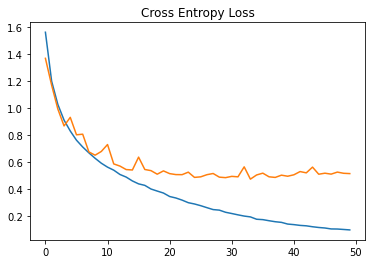

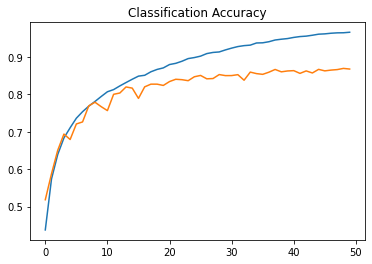

In [ ]:
# define cnn model
def define_model():
	model = Sequential()
	model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=(32, 32, 3)))
	model.add(BatchNormalization())
	model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
	model.add(BatchNormalization())
	model.add(MaxPooling2D((2, 2)))
	model.add(Dropout(0.2))
 
	model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
	model.add(BatchNormalization())	
	model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
	model.add(BatchNormalization())
	model.add(MaxPooling2D((2, 2)))
	model.add(Dropout(0.2))
 
	model.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
	model.add(BatchNormalization())	
	model.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
	model.add(BatchNormalization())	
	model.add(MaxPooling2D((2, 2)))
	model.add(Dropout(0.2))
 
	model.add(Flatten())
	model.add(Dense(1024, activation='relu'))
	model.add(Dropout(0.2))
	model.add(Dense(512, activation='relu'))
	model.add(Dropout(0.2)) 
	model.add(Dense(10, activation='softmax')) 
	# compile model
	opt = SGD(lr=0.001, momentum=0.9)
	model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
	return model

model = define_model()

history = model.fit(x_train, y_train_hot, epochs=50, batch_size=32, validation_data=(x_valid, y_valid_hot), verbose=1)

print('\n ####################################################### \n')
_, acc = model.evaluate(x_test, y_test_hot, verbose=1)

plot_curves(history)

### Confusion matrix

Text(0.5, 69.0, 'Predictions')

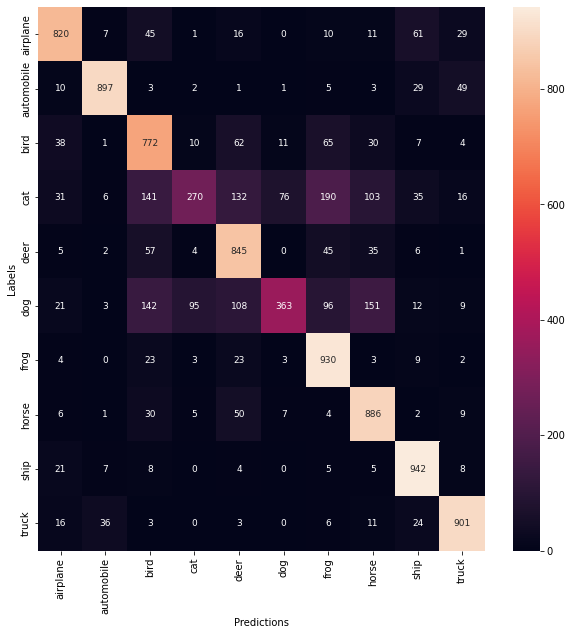

In [ ]:
y_pred=model.predict(x_test)
con = tf.math.confusion_matrix(labels=tf.argmax(y_test_hot, axis=1), predictions=tf.argmax(y_pred, axis=1), num_classes=num_classes).numpy()
df_cm = pd.DataFrame(con, index = [i for i in class_names], columns = [i for i in class_names])
plt.figure(figsize = (10,10))
sn.heatmap(df_cm, annot=True, fmt='.0f',annot_kws={"size": 9})
plt.ylabel('Labels')
plt.xlabel('Predictions')

Text(0.5, 69.0, 'Predictions')

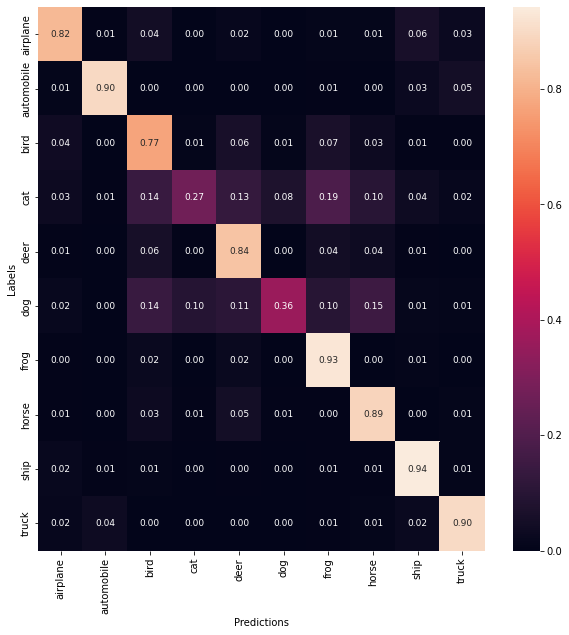

In [ ]:
# Normalize confution matrix 
cmn = con.astype('float') / con.sum(axis=1)[:, np.newaxis]
df_cm = pd.DataFrame(cmn, index = [i for i in class_names], columns = [i for i in class_names])
plt.figure(figsize = (10,10))
sn.heatmap(df_cm, annot=True, fmt='.2f',annot_kws={"size": 9})
plt.ylabel('Labels')
plt.xlabel('Predictions')

## Train model (with Data augmentation)

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


Epoch 1/50
1250/1250 [==============================] - 41s 25ms/step - loss: 1.5928 - accuracy: 0.4225 - val_loss: 1.4010 - val_accuracy: 0.5099
Epoch 2/50
1250/1250 [==============================] - 30s 24ms/step - loss: 1.1911 - accuracy: 0.5642 - val_loss: 0.9883 - val_accuracy: 0.6415
Epoch 3/50
1250/1250 [==============================] - 30s 24ms/step - loss: 1.0267 - accuracy: 0.6254 - val_loss: 0.9273 - val_accuracy: 0.6687
Epoch 4/50
1250/1250 [==============================] - 30s 24ms/step - loss: 0.9146 - accuracy: 0.6689 - val_loss: 0.8343 - val_accuracy: 0.7041
Epoch 5/50
1250/1250 [==============================] - 30s 24ms/step - loss: 0.8359 - accuracy: 0.6984 - val_loss: 0.7917 - val_accuracy: 0.7216
Epoch 6/50
1250/1250 [==============================] - 29s 24ms/step - loss: 0.7713 - accuracy: 0.7217 - val_loss: 0.7303 - val_accuracy: 0.7412
Epoch 7/50
1250/1250 [==============================] - 30s 24ms/step - loss: 0.7186 - accuracy: 0.7415 - val_loss: 0.6771 -

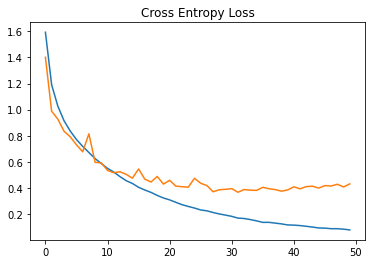

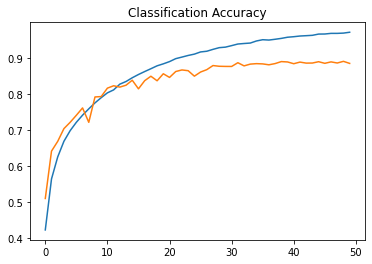

In [ ]:
# define cnn model
def define_model():
	model = Sequential()
	model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=(32, 32, 3)))
	model.add(BatchNormalization())
	model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
	model.add(BatchNormalization())
	model.add(MaxPooling2D((2, 2)))
	model.add(Dropout(0.2))
 
	model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
	model.add(BatchNormalization())	
	model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
	model.add(BatchNormalization())
	model.add(MaxPooling2D((2, 2)))
	model.add(Dropout(0.2))
 
	model.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
	model.add(BatchNormalization())	
	model.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
	model.add(BatchNormalization())	
	model.add(MaxPooling2D((2, 2)))
	model.add(Dropout(0.2))
 
	model.add(Flatten())
	model.add(Dense(1024, activation='relu'))
	model.add(Dropout(0.2))
	model.add(Dense(512, activation='relu'))
	model.add(Dropout(0.2)) 
	model.add(Dense(10, activation='softmax')) 
	# compile model
	opt = SGD(lr=0.001, momentum=0.9)
	model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
	return model

model = define_model()

history = model.fit(x_train_inc, y_train_inc_hot, epochs=50, batch_size=32, validation_data=(x_valid_inc, y_valid_inc_hot), verbose=1)

print('\n ####################################################### \n')
_, acc = model.evaluate(x_test, y_test_hot, verbose=1)

plot_curves(history)

### Confusion matrix

Text(0.5, 69.0, 'Predictions')

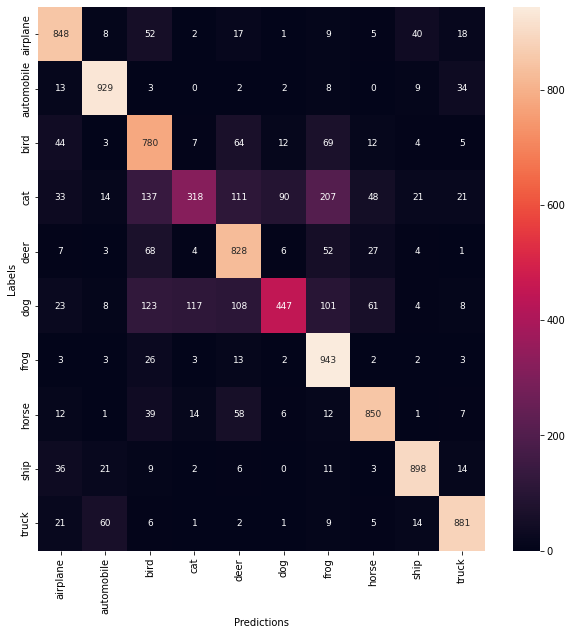

In [ ]:
y_pred=model.predict(x_test)
con = tf.math.confusion_matrix(labels=tf.argmax(y_test_hot, axis=1), predictions=tf.argmax(y_pred, axis=1), num_classes=num_classes).numpy()
df_cm = pd.DataFrame(con, index = [i for i in class_names], columns = [i for i in class_names])
plt.figure(figsize = (10,10))
sn.heatmap(df_cm, annot=True, fmt='.0f',annot_kws={"size": 9})
plt.ylabel('Labels')
plt.xlabel('Predictions')

Text(0.5, 69.0, 'Predictions')

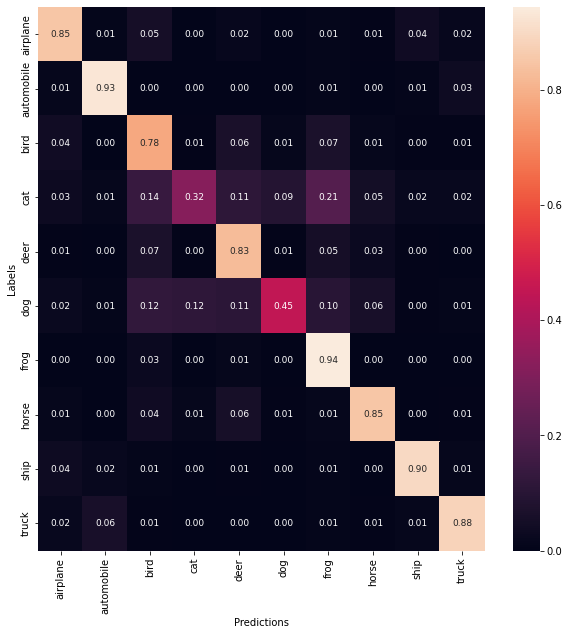

In [ ]:
# Normalize confution matrix 
cmn = con.astype('float') / con.sum(axis=1)[:, np.newaxis]
df_cm = pd.DataFrame(cmn, index = [i for i in class_names], columns = [i for i in class_names])
plt.figure(figsize = (10,10))
sn.heatmap(df_cm, annot=True, fmt='.2f',annot_kws={"size": 9})
plt.ylabel('Labels')
plt.xlabel('Predictions')

## Train model (with Data augmentation)

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


Epoch 1/50
1250/1250 [==============================] - 38s 29ms/step - loss: 1.5235 - accuracy: 0.4543 - val_loss: 3.4766 - val_accuracy: 0.0517
Epoch 2/50
1250/1250 [==============================] - 37s 30ms/step - loss: 1.1503 - accuracy: 0.5909 - val_loss: 3.1219 - val_accuracy: 0.0708
Epoch 3/50
1250/1250 [==============================] - 37s 30ms/step - loss: 0.9888 - accuracy: 0.6553 - val_loss: 2.8635 - val_accuracy: 0.0993
Epoch 4/50
1250/1250 [==============================] - 37s 30ms/step - loss: 0.8732 - accuracy: 0.6948 - val_loss: 2.6969 - val_accuracy: 0.1379
Epoch 5/50
1250/1250 [==============================] - 37s 29ms/step - loss: 0.7952 - accuracy: 0.7250 - val_loss: 2.2911 - val_accuracy: 0.1936
Epoch 6/50
1250/1250 [==============================] - 37s 29ms/step - loss: 0.7269 - accuracy: 0.7484 - val_loss: 2.1875 - val_accuracy: 0.2337
Epoch 7/50
1250/1250 [==============================] - 38s 30ms/step - loss: 0.6764 - accuracy: 0.7663 - val_loss: 2.1940 -

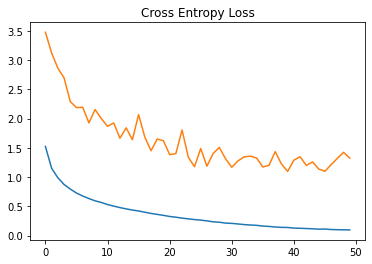

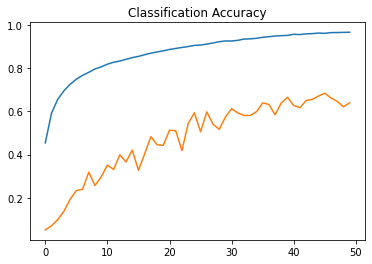

In [ ]:
# define cnn model
def define_model():
	model = Sequential()
	model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=(32, 32, 3)))
	model.add(BatchNormalization())
	model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
	model.add(BatchNormalization())
	model.add(MaxPooling2D((2, 2)))
	model.add(Dropout(0.2))
 
	model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
	model.add(BatchNormalization())	
	model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
	model.add(BatchNormalization())
	model.add(MaxPooling2D((2, 2)))
	model.add(Dropout(0.2))
 
	model.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
	model.add(BatchNormalization())	
	model.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
	model.add(BatchNormalization())	
	model.add(MaxPooling2D((2, 2)))
	model.add(Dropout(0.2))
 
	model.add(Flatten())
	model.add(Dense(1024, activation='relu'))
	model.add(Dropout(0.2))
	model.add(Dense(512, activation='relu'))
	model.add(Dropout(0.2)) 
	model.add(Dense(10, activation='softmax')) 
	# compile model
	opt = SGD(lr=0.001, momentum=0.9)
	model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
	return model

model = define_model()

history = model.fit(x_train_inc, y_train_inc_hot, epochs=50, batch_size=32, validation_data=(x_valid_inc, y_valid_inc_hot), verbose=1)

print('\n ####################################################### \n')
_, acc = model.evaluate(x_test, y_test_hot, verbose=1)

plot_curves(history)

### Confusion matrix

Text(0.5, 69.0, 'Predictions')

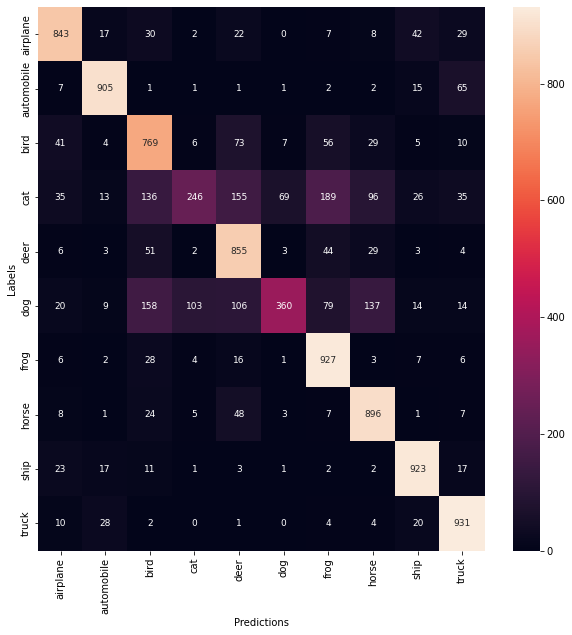

In [ ]:
y_pred=model.predict(x_test)
con = tf.math.confusion_matrix(labels=tf.argmax(y_test_hot, axis=1), predictions=tf.argmax(y_pred, axis=1), num_classes=num_classes).numpy()
df_cm = pd.DataFrame(con, index = [i for i in class_names], columns = [i for i in class_names])
plt.figure(figsize = (10,10))
sn.heatmap(df_cm, annot=True, fmt='.0f',annot_kws={"size": 9})
plt.ylabel('Labels')
plt.xlabel('Predictions')

Text(0.5, 69.0, 'Predictions')

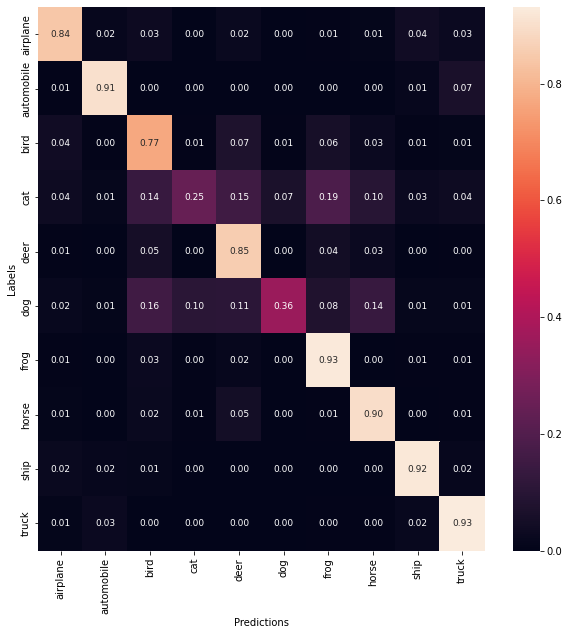

In [ ]:
# Normalize confution matrix 
cmn = con.astype('float') / con.sum(axis=1)[:, np.newaxis]
df_cm = pd.DataFrame(cmn, index = [i for i in class_names], columns = [i for i in class_names])
plt.figure(figsize = (10,10))
sn.heatmap(df_cm, annot=True, fmt='.2f',annot_kws={"size": 9})
plt.ylabel('Labels')
plt.xlabel('Predictions')

# Transfer learning (Extera 1)

## VGG16

In [ ]:
# Implement vgg16
model = VGG16()
model.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_13 (InputLayer)       [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

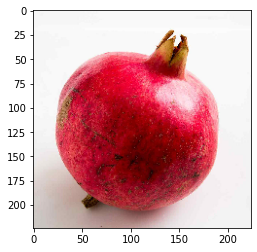

In [ ]:
image = load_img('anar.jpg', target_size=(224, 224))
plt.imshow(image)

image = tf.keras.preprocessing.image.img_to_array(image)
image = image.reshape((1, image.shape[0], image.shape[1], image.shape[2]))

image = preprocess_input(image)
p = model.predict(image)
label = decode_predictions(p)

In [ ]:
# our labels
label[0][:3]

[('n07768694', 'pomegranate', 0.99127287),
 ('n07753113', 'fig', 0.0074562416),
 ('n07753592', 'banana', 0.0006549005)]

## Transfer learning on VGG16 model for two class dataset

In [ ]:
# two class = roses and sunflowers from tf_flowers dataset
## Loading images and labels
(train_ds, train_labels), (test_ds, test_labels) = tfds.load(
    "tf_flowers",
    split=["train[:70%]", "train[:30%]"], ## Train test split
    batch_size=-1,
    as_supervised=True,  # Include labels
)


a0 = (train_labels == 2).numpy().reshape(-1,) #roses
a1 = (train_labels == 3).numpy().reshape(-1,) #sunflowers
num_rose = train_ds[a0].shape[0]
num_sunflow = train_ds[a1].shape[0]
train_ds = np.concatenate((train_ds[a0], train_ds[a1]), axis=0) # new train_ds
train_labels = np.concatenate((train_labels[a0], train_labels[a1]), axis=0) - 2 # new train_labels

a00 = (test_labels == 2).numpy().reshape(-1,) #roses
a11 = (test_labels == 3).numpy().reshape(-1,) #sunflowers
test_ds = np.concatenate((test_ds[a00], test_ds[a11]), axis=0) # new test_ds
test_labels = np.concatenate((test_labels[a00], test_labels[a11]), axis=0) - 2 # new test_labels

## Resizing images
train_ds = tf.image.resize(train_ds, (150, 150))
test_ds = tf.image.resize(test_ds, (150, 150))

## Transforming labels to correct format
train_labels = to_categorical(train_labels, num_classes=2)
test_labels = to_categorical(test_labels, num_classes=2)

local data directory. If you'd instead prefer to read directly from our public
GCS bucket (recommended if you're running on GCP), you can instead pass
`try_gcs=True` to `tfds.load` or set `data_dir=gs://tfds-data/datasets`.



Dl Completed...:   0%|          | 0/5 [00:00<?, ? file/s]


Dataset tf_flowers downloaded and prepared to /root/tensorflow_datasets/tf_flowers/3.0.1. Subsequent calls will reuse this data.
Instructions for updating:
Use `tf.data.Dataset.get_single_element()`.


Instructions for updating:
Use `tf.data.Dataset.get_single_element()`.


In [ ]:
# check shape 
print('x_train:\t {}'.format(train_ds.shape))
print('y_train:\t {}\n'.format(train_labels.shape))

print('x_test:\t\t {}'.format(test_ds.shape))
print('y_test:\t\t {}\n'.format(test_labels.shape))

print('Number of roses:\t {}'.format(num_rose))
print('Number of sunflowers:\t {}'.format(num_sunflow))

x_train:	 (1027, 150, 150, 3)
y_train:	 (1027, 2)

x_test:		 (429, 150, 150, 3)
y_test:		 (429, 2)

Number of roses:	 531
Number of sunflowers:	 496


In [ ]:
## Loading VGG16 model
# We use Include_top=False to remove the classification layer that was trained on the ImageNet dataset and set the model as not trainable
base_model = VGG16(weights="imagenet", include_top=False, input_shape=train_ds[0].shape) 
base_model.trainable = False ## Not trainable weights

## Preprocessing input
train_ds = preprocess_input(train_ds) 
test_ds = preprocess_input(test_ds)

58900480/58889256 [==============================] - 1s 0us/step


In [ ]:
base_model.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 150, 150, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 150, 150, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 150, 150, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 75, 75, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 75, 75, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 75, 75, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 37, 37, 128)       0     

In [ ]:
flatten_layer = layers.Flatten()
dense_layer_1 = layers.Dense(50, activation='relu')
dense_layer_2 = layers.Dense(20, activation='relu')
prediction_layer = layers.Dense(2, activation='softmax')


model = models.Sequential([
    base_model,
    flatten_layer,
    dense_layer_1,
    dense_layer_2,
    prediction_layer
])

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


es = EarlyStopping(monitor='val_accuracy', mode='max', patience=5,  restore_best_weights=True)

history = model.fit(train_ds, train_labels, epochs=10, validation_split=0.2, batch_size=32, callbacks=[es])

Epoch 1/10
26/26 [==============================] - 7s 228ms/step - loss: 0.1559 - accuracy: 0.9488 - val_loss: 0.5772 - val_accuracy: 0.9078
Epoch 2/10
26/26 [==============================] - 5s 212ms/step - loss: 0.0963 - accuracy: 0.9732 - val_loss: 1.5334 - val_accuracy: 0.8204
Epoch 3/10
26/26 [==============================] - 5s 212ms/step - loss: 0.0775 - accuracy: 0.9842 - val_loss: 0.7752 - val_accuracy: 0.9029
Epoch 4/10
26/26 [==============================] - 5s 211ms/step - loss: 0.0208 - accuracy: 0.9939 - val_loss: 1.8773 - val_accuracy: 0.8689
Epoch 5/10
26/26 [==============================] - 5s 212ms/step - loss: 0.0087 - accuracy: 0.9976 - val_loss: 1.6224 - val_accuracy: 0.8592
Epoch 6/10
26/26 [==============================] - 6s 213ms/step - loss: 0.0084 - accuracy: 0.9963 - val_loss: 1.6369 - val_accuracy: 0.8883


In [ ]:
model.evaluate(test_ds, test_labels)

14/14 [==============================] - 2s 164ms/step - loss: 0.1848 - accuracy: 0.9650


[0.18481914699077606, 0.9650349617004395]

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


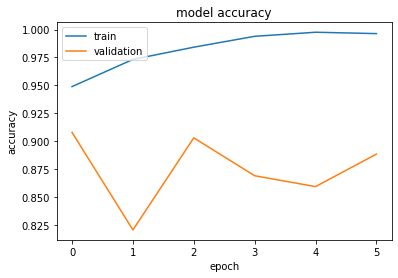

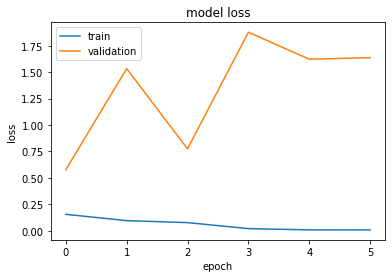

In [ ]:
# list all data in history
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

# DeepPose(Extera 2)

In [19]:
from google.colab import drive
drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [20]:
cd 'drive/MyDrive/Colab Notebooks/DL/HW2/lsp_dataset'

[Errno 2] No such file or directory: 'drive/MyDrive/Colab Notebooks/DL/HW2/lsp_dataset'
/content/drive/MyDrive/Colab Notebooks/DL/HW2/lsp_dataset


In [21]:
import os
import numpy as np
import matplotlib.pyplot as plt
import scipy.io
import skimage.transform
import torch
from torch.utils.data import DataLoader
import torch.nn as nn

torch.manual_seed(0)
torch.backends.cudnn.deterministic = True
torch.autograd.set_detect_anomaly(True)

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Using device: {device}")

Using device: cuda


## Create lsp dataset

In [22]:
# Build Dataset
class LSP_Dataset(torch.utils.data.Dataset):
  
  def __init__(self, path="."): #/content/drive/My Drive
    self.path = path

    imgs_list = sorted(os.listdir(os.path.join(path, "images")))
    
    # Load joints data from the mat file
    self.joint_data = scipy.io.loadmat(os.path.join(path, "joints.mat"))["joints"]
    
    self.dataset_size = self.joint_data.shape[2]
    
    assert len(imgs_list) == self.dataset_size

    self.max_h, self.max_w = 196, 196

    # Load and store images (float) into a list
    self.array_of_images = np.empty([self.dataset_size, self.max_h, self.max_w, 3], dtype=float) # (2000,196,196,3)
    self.array_of_labels = np.empty([self.dataset_size, 3, 14], dtype=float) #N x (X,Y) x (14 joints) = (2000,2,14)
    
    for file_idx, file_name in enumerate(imgs_list):
      img, labels = self.scale_and_pad( plt.imread(os.path.join(path, "images", file_name)), self.joint_data[:2,:,file_idx])
      
      self.array_of_images[file_idx] = img
      self.array_of_labels[file_idx, :2, :] = labels
      self.array_of_labels[file_idx, 2, :]  = self.joint_data[2, :, file_idx]
    
  def scale_and_pad(self, img, labels):
    scale_factor = self.max_h/max(*img.shape)

    scaled_img = skimage.transform.rescale(img, scale=scale_factor, multichannel=True)

    img_h, img_w, _   = scaled_img.shape
    padded_scaled_img = np.zeros([self.max_h, self.max_w, 3])
    start_h, start_w  = int((self.max_h - img_h)/2), int((self.max_w - img_w)/2)

    padded_scaled_img[start_h:start_h + img_h, start_w:start_w + img_w, :] = scaled_img
    padded_scaled_labels = (labels*scale_factor + np.array([[start_w], [start_h]]))/self.max_h - 0.5
    return padded_scaled_img, padded_scaled_labels
    
  def __getitem__(self,idx):
    return self.array_of_images[idx], self.array_of_labels[idx]

  def __len__(self):
    return self.array_of_images.shape[0]

## Create model

In [23]:
class DeepPose(nn.Module):
    def __init__(self):
        super(DeepPose,self).__init__()

        self.conv1 = nn.Conv2d(in_channels=3, out_channels=96, kernel_size=11, stride=4, padding=0)
        self.relu_conv1 = nn.ReLU(inplace=True)
        self.lrn1  = nn.LocalResponseNorm(size=2, alpha=2e-05, beta=0.75, k=1)
        self.pool1 = nn.MaxPool2d(kernel_size=3, stride=2, padding=0)

        self.conv2 = nn.Conv2d(in_channels=96, out_channels=256, kernel_size=5, stride=1, padding=0)
        self.relu_conv2 = nn.ReLU(inplace=True)
        self.lrn2  = nn.LocalResponseNorm(size=2, alpha=2e-05, beta=0.75, k=1)
        self.pool2 = nn.MaxPool2d(kernel_size=3, stride=2, padding=0)

        self.conv3 = nn.Conv2d(in_channels=256, out_channels=384, kernel_size=3, stride=1, padding=0)
        
        self.relu_conv3 = nn.ReLU(inplace=True)
        
        self.conv4 = nn.Conv2d(in_channels=384, out_channels=384, kernel_size=3, stride=1, padding=0)
        self.relu_conv4 = nn.ReLU(inplace=True)
        
        self.conv5 = nn.Conv2d(in_channels=384, out_channels=256, kernel_size=3, stride=1, padding=0)
        self.relu_conv5 = nn.ReLU(inplace=True)
        
        self.pool3 = nn.MaxPool2d(kernel_size=3, stride=2, padding=0)

        self.fc1 = nn.Linear(in_features=256, out_features=4096)
        self.relu_fc1 = nn.ReLU(inplace=True)
        self.dropout_fc1 = nn.Dropout(p=0.6)
        
        self.fc2 = nn.Linear(in_features=4096, out_features=4096)
        self.relu_fc2 = nn.ReLU(inplace=True)
        self.dropout_fc2 = nn.Dropout(p=0.6)
        
        self.out = nn.Linear(in_features=4096, out_features=28)
        
    def forward(self,input):
        x = input.view((input.shape[0],input.shape[3],input.shape[1],input.shape[2]))
        x = self.pool1(self.lrn1(self.relu_conv1(self.conv1(x))))
        x = self.pool2(self.lrn2(self.relu_conv2(self.conv2(x))))
        x = self.relu_conv3(self.conv3(x))
        x = self.relu_conv4(self.conv4(x))
        x = self.pool3(self.relu_conv5(self.conv5(x)))
        x = torch.flatten(x,1)
        x = self.dropout_fc1(self.relu_fc1(self.fc1(x)))
        x = self.dropout_fc2(self.relu_fc2(self.fc2(x)))
        x = self.out(x)

        return x

In [24]:
def eval_relaxed_pcp(gt_joints, predicted_joints, thresh=0.5): #delete
    """
    Relaxed PCP as in DeepPose paper.
    Compute average relaxed pcp per stick.
    Args:
      gt_joints, predicted_joints: arrays of gt and predicted joints in the canonical order
      thresh: fraction of the gt stick length. This is the maximal average deviation of the
        predicted joints of the stick from the gt joints position of the stick.
    Returns:
        pcp_per_stick: array of pcp scores. i-th element is the pcp score for the i-th stick
    """
    num_examples = len(gt_joints)
    # the number of sticks for a pose
    num_sticks = gt_joints[0].shape[0]
    is_matched = np.zeros((num_examples, num_sticks), dtype=int)
    
    for i in range(num_examples):
        for stick_id in range(num_sticks):
            gt_stick_len = np.linalg.norm(gt_joints[i]['sticks'][stick_id, :2] -
                                          gt_joints[i]['sticks'][stick_id, 2:])
            delta_a = np.linalg.norm(predicted_joints[i]['sticks'][stick_id, :2] -
                                     gt_joints[i]['sticks'][stick_id, :2]) / gt_stick_len
            delta_b = np.linalg.norm(predicted_joints[i]['sticks'][stick_id, 2:] -
                                     gt_joints[i]['sticks'][stick_id, 2:]) / gt_stick_len
            delta = (delta_a + delta_b) / 2.0

            is_matched[i, stick_id] = delta <= thresh
    pcp_per_stick = np.mean(is_matched, 0)
    return pcp_per_stick

In [25]:
def project_joint_onto_original_image(joints, original_bbox=[0,0,196,196]):
    """
    Args:
      joints: 2D array [num_joints x 2] of joints with normalized coordinates.
        Normalized coordinates (0,0) is  the center of the bbox.
        Bbox top left is (-0.5, -0.5), bottom right is (0.5, 0.5).
      original_bbox: array [x, y, w, h] - bbox coordinates (in pixels) on the original full size image.
    Returns:
      projected_joints: in pixel coordinates
    """
    x = 0
    y = 0
    w = 196
    h = 196
    projected_joints = np.array(joints, dtype=np.float32)
    projected_joints += np.array([0.5, 0.5])
    projected_joints[:, 0] *= w
    projected_joints[:, 1] *= h
    projected_joints += np.array([x, y])
    return projected_joints

In [26]:
def joints2sticks(joints):
    """
    Args:
        joints: array of joints in the canonical order.
      The canonical joint order:
        0 Head top
        1 Neck
        2 Right shoulder (from person's perspective)
        3 Right elbow
        4 Right wrist
        5 Right hip
        6 Right knee
        7 Right ankle
        8 Left shoulder
        9 Left elbow
        10 Left wrist
        11 Left hip
        12 Left knee
        13 Left ankle
    Returns:
        sticks: array of sticks in the canonical order.
      The canonical part stick order:
        0 Head
        1 Torso
        2 Right Upper Arm
        3 Right Lower Arm
        4 Right Upper Leg
        5 Right Lower Leg
        6 Left Upper Arm
        7 Left Lower Arm
        8 Left Upper Leg
        9 Left Lower Leg
    """
    assert joints.shape == (14, 2)
    stick_n = 10  # number of stick
    sticks = np.zeros((stick_n, 4), dtype=np.float32)
    sticks[0, :] = np.hstack([joints[0, :], joints[1, :]])  # Head
    sticks[1, :] = np.hstack([(joints[2, :] + joints[8, :]) / 2.0,
                             (joints[5, :] + joints[11, :]) / 2.0])  # Torso
    sticks[2, :] = np.hstack([joints[2, :], joints[3, :]])  # Left U.arms
    sticks[3, :] = np.hstack([joints[3, :], joints[4, :]])  # Left L.arms
    sticks[4, :] = np.hstack([joints[5, :], joints[6, :]])  # Left U.legs
    sticks[5, :] = np.hstack([joints[6, :], joints[7, :]])  # Left L.legs
    sticks[6, :] = np.hstack([joints[8, :], joints[9, :]])  # Right U.arms
    sticks[7, :] = np.hstack([joints[9, :], joints[10, :]])  # Right L.arms
    sticks[8, :] = np.hstack([joints[11, :], joints[12, :]])  # Right U.legs
    sticks[9, :] = np.hstack([joints[12, :], joints[13, :]])  # Right L.legs
    return sticks

In [27]:
def convert2canonical(joints):
    """
    Convert joints to evaluation structure.
    Permute joints according to the canonical joint order.
    """
    assert joints.shape[1:] == (14, 2), 'LSP must contain 14 joints per person'
    # convert to the canonical joint order
    joint_order = [13,  # Head top
                   12,  # Neck
                   8,   # Right shoulder
                   7,   # Right elbow
                   6,   # Right wrist
                   2,   # Right hip
                   1,   # Right knee
                   0,   # Right ankle
                   9,   # Left shoulder
                   10,  # Left elbow
                   11,  # Left wrist
                   3,   # Left hip
                   4,   # Left knee
                   5]   # Left ankle
    canonical = [dict() for _ in range(joints.shape[0])]
    for i in range(joints.shape[0]):
        canonical[i]['joints'] = joints[i, joint_order, :]
        canonical[i]['sticks'] = joints2sticks(canonical[i]['joints'])
    return canonical

In [28]:
def eval_strict_pcp(gt_joints, predicted_joints, thresh=0.5):
    """
    Compute average pcp per stick
    Args:
      gt_joints, predicted_joints: arrays of gt and predicted joints in the canonical order
      thresh: fraction of the gt stick length. This is the maximal deviation of the
        predicted joint from the gt joint position.
    Returns:
        pcp_per_stick: array of pcp scores. i-th element is the pcp score for the i-th stick
    """
    num_examples = len(gt_joints) # 16
    # the number of sticks for a pose
    num_sticks = gt_joints[0]['sticks'].shape[0] # 14
    is_matched = np.zeros((num_examples, num_sticks), dtype=int)
    for i in range(num_examples):
        for stick_id in range(num_sticks):
            gt_stick_len = np.linalg.norm(gt_joints[i]['sticks'][stick_id, :2] -
                                          gt_joints[i]['sticks'][stick_id, 2:])
            #print(gt_stick_len)
            delta_a = np.linalg.norm(predicted_joints[i]['sticks'][stick_id, :2] -
                                            gt_joints[i]['sticks'][stick_id, :2]) / gt_stick_len
            delta_b = np.linalg.norm(predicted_joints[i]['sticks'][stick_id, 2:] -
                                            gt_joints[i]['sticks'][stick_id, 2:]) / gt_stick_len

            is_matched[i, stick_id] = (delta_a <= thresh and delta_b <= thresh)
    pcp_per_stick = np.mean(is_matched, 0)
    return pcp_per_stick

In [29]:
def calculate_metric(gt_joints, predicted_joints, orig_bboxes=[0,0,196,196], metric_name='PCP'):

    gt_joints = gt_joints.cpu().detach().numpy()
    predicted_joints = predicted_joints.cpu().detach().numpy()

    predicted_joints = np.clip(predicted_joints, -0.5, 0.5)
    # convert joints
    for i in range(gt_joints.shape[0]):
        gt_joints[i, ...] = project_joint_onto_original_image(gt_joints[i], orig_bboxes)
        predicted_joints[i, ...] = project_joint_onto_original_image(predicted_joints[i], orig_bboxes)

    gt_joints = convert2canonical(gt_joints)
    predicted_joints = convert2canonical(predicted_joints)
    if metric_name == 'PCP':
        full_scores = eval_strict_pcp(gt_joints, predicted_joints)
    return full_scores

In [30]:
def train(epochs, model, train_dl, val_dl, optimizer, criterion, train_size, val_size):
  train_loss_lst, val_loss_lst, batch_epoch_loss_lst = [], [], []
  val_pcp = []

  for e in range(epochs):
    train_loss, val_loss = 0, 0
    
    # Training
    model.train()
    for batch_idx,(batch_imgs, batch_labels) in enumerate(train_dl):
      optimizer.zero_grad()
      batch_imgs,batch_labels = batch_imgs.float().to(device),batch_labels.to(device)
      output = model(batch_imgs)
      
      batch_labels = batch_labels[:, :2, :].permute((0,2,1))
      # Reshape the outputs of shape (batch_size x 28) -> (batch_size x 14 x 2)
      output = output.view(batch_labels.shape)
      
      loss = criterion(output, batch_labels.float())
      batch_epoch_loss_lst.append(loss.item())
      loss.backward()
      optimizer.step()
      train_loss += loss.item()    
    
    train_loss_lst.append(train_loss/train_size)
    
    # Validation
    model.eval()
    for batch_idx,(batch_imgs,batch_labels) in enumerate(val_dl):
      batch_imgs, batch_labels = batch_imgs.float().to(device),batch_labels.to(device)
      output = model(batch_imgs)
      
      batch_labels = batch_labels[:, :2, :].permute((0,2,1))
      # Reshape the outputs of shape (batch_size x 28) -> (batch_size x 14 x 2)
      output = output.view(batch_labels.shape)
      loss = criterion(output, batch_labels.float())
      val_loss += loss.item()

    val_loss_lst.append(val_loss/val_size)
    

    pcp_per_stick = calculate_metric(output, batch_labels.float(), metric_name='PCP')  
    val_pcp.append(pcp_per_stick)

    print("[{}/{}]: Train loss={:2.4f}, Validation loss={:2.4f}".format(e+1,epochs,train_loss_lst[-1],val_loss_lst[-1]))

    if train_loss_lst[-1]<=0.25:
      for param in optimizer.param_groups:
        param["lr"]=5e-4

    if train_loss_lst[-1]<=0.15:
      for param in optimizer.param_groups:
        param["lr"]=1e-4

  return train_loss_lst, val_loss_lst, batch_epoch_loss_lst, val_pcp

## Train Model

In [32]:
lsp_dataset = LSP_Dataset()
dataset = torch.utils.data.ConcatDataset([lsp_dataset]) 

batch_size = 16
total = len(dataset)
train_size, val_size, test_size = int(total*0.7), int(total*0.15), int(total*0.15)

lengths = [train_size, val_size, test_size]
train_dataset, val_dataset, test_dataset = torch.utils.data.dataset.random_split(dataset, lengths)

train_dl = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
val_dl   = DataLoader(val_dataset, batch_size=batch_size, shuffle=True)
test_dl  = DataLoader(test_dataset, batch_size=batch_size, shuffle=True)

model = DeepPose().float().to(device)

criterion = nn.MSELoss(reduction="sum")
optimizer = torch.optim.Adagrad(model.parameters(),lr=1e-3)

train_loss_lst, val_loss_lst, batch_epoch_loss_lst, val_pcp = train( epochs=50, 
                                                              model=model, 
                                                              train_dl=train_dl, 
                                                              val_dl=val_dl, 
                                                              optimizer=optimizer, 
                                                              criterion=criterion, 
                                                              train_size=train_size, 
                                                              val_size=val_size)

[1/50]: Train loss=0.4466, Validation loss=0.3220
[2/50]: Train loss=0.3730, Validation loss=0.3165
[3/50]: Train loss=0.3709, Validation loss=0.3183
[4/50]: Train loss=0.3643, Validation loss=0.3282
[5/50]: Train loss=0.3615, Validation loss=0.3214
[6/50]: Train loss=0.3582, Validation loss=0.3195
[7/50]: Train loss=0.3566, Validation loss=0.3065
[8/50]: Train loss=0.3549, Validation loss=0.3175
[9/50]: Train loss=0.3535, Validation loss=0.3059
[10/50]: Train loss=0.3516, Validation loss=0.3298
[11/50]: Train loss=0.3497, Validation loss=0.3133
[12/50]: Train loss=0.3467, Validation loss=0.3008
[13/50]: Train loss=0.3447, Validation loss=0.3144
[14/50]: Train loss=0.3414, Validation loss=0.3212
[15/50]: Train loss=0.3402, Validation loss=0.3076
[16/50]: Train loss=0.3383, Validation loss=0.3058
[17/50]: Train loss=0.3366, Validation loss=0.3073
[18/50]: Train loss=0.3354, Validation loss=0.3044
[19/50]: Train loss=0.3318, Validation loss=0.3023
[20/50]: Train loss=0.3302, Validation l

## Calculate metrics

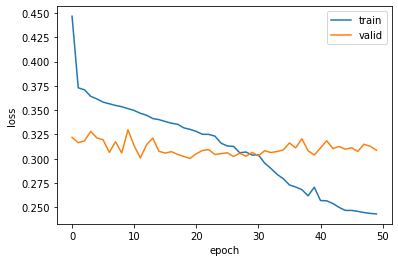

In [35]:
plt.plot(train_loss_lst, label='train')
plt.plot(val_loss_lst, label='valid')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend()

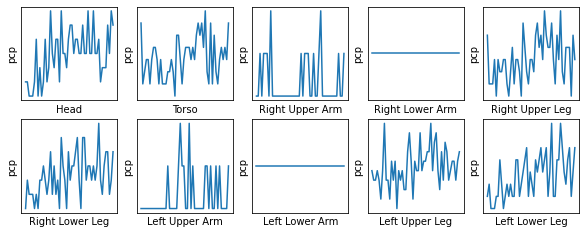

In [40]:
class_names = ['Head', 'Torso', 'Right Upper Arm', 'Right Lower Arm',
               'Right Upper Leg', 'Right Lower Leg', 'Left Upper Arm',
               'Left Lower Arm', 'Left Upper Leg', 'Left Lower Leg']
               
plt.figure(figsize=(10,10))
for i in range(10):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.plot([s[i] for s in val_pcp])
    plt.xlabel(class_names[i])
    plt.ylabel('pcp')
plt.show()